In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import precision_recall_curve
import catboost as cb
import gc
from sklearn.metrics import auc
import os

In [2]:
# Empty dict to store data
all_data = {}

In [3]:
# Obtaining directory of test datasets
d = '/Users/admin/BT4012/Project/Test'
test_files = os.listdir(d)
test_files = sorted(test_files)
test_files = [os.path.join(d, x) for x in test_files]
test_files.pop(0)
test_files

['/Users/admin/BT4012/Project/Test/test1.csv',
 '/Users/admin/BT4012/Project/Test/test2.csv',
 '/Users/admin/BT4012/Project/Test/test3.csv',
 '/Users/admin/BT4012/Project/Test/test4.csv',
 '/Users/admin/BT4012/Project/Test/test5.csv']

In [4]:
# Obtaining directory of train datasets for ROS 50-50
d = '/Users/admin/BT4012/Project/ROS_50_50'
train_files =  os.listdir(d)
train_files = sorted(train_files)
train_files = [os.path.join(d, x) for x in train_files]
train_files.pop(0)
# Store data into dict
all_data['ROS_50_50'] = train_files

In [5]:
# Obtaining directory of train datasets for ROS 60-40
d = '/Users/admin/BT4012/Project/ROS_60_40'
train_files =  os.listdir(d)
train_files = sorted(train_files)
train_files = [os.path.join(d, x) for x in train_files]
train_files.pop(0)
# Store data into dict
all_data['ROS_60_40'] = train_files

In [6]:
# Obtaining directory of train datasets for ROS 80-20
d = '/Users/admin/BT4012/Project/ROS_80_20'
train_files =  os.listdir(d)
train_files = sorted(train_files)
train_files = [os.path.join(d, x) for x in train_files]
train_files.pop(0)
# Store data into dict
all_data['ROS_80_20'] = train_files

In [7]:
# Obtaining directory of train datasets for ROS 99-1
d = '/Users/admin/BT4012/Project/ROS_99_1'
train_files =  os.listdir('/Users/admin/BT4012/Project/ROS_99_1')
train_files = sorted(train_files)
train_files = [os.path.join(d, x) for x in train_files]
train_files.pop(0)
# Store data into dict
all_data['ROS_99_1'] = train_files

In [8]:
all_data

{'ROS_50_50': ['/Users/admin/BT4012/Project/ROS_50_50/ROS_1_1.csv',
  '/Users/admin/BT4012/Project/ROS_50_50/ROS_1_2.csv',
  '/Users/admin/BT4012/Project/ROS_50_50/ROS_1_3.csv',
  '/Users/admin/BT4012/Project/ROS_50_50/ROS_1_4.csv',
  '/Users/admin/BT4012/Project/ROS_50_50/ROS_1_5.csv'],
 'ROS_60_40': ['/Users/admin/BT4012/Project/ROS_60_40/ROS_0.6666666666666666_1.csv',
  '/Users/admin/BT4012/Project/ROS_60_40/ROS_0.6666666666666666_2.csv',
  '/Users/admin/BT4012/Project/ROS_60_40/ROS_0.6666666666666666_3.csv',
  '/Users/admin/BT4012/Project/ROS_60_40/ROS_0.6666666666666666_4.csv',
  '/Users/admin/BT4012/Project/ROS_60_40/ROS_0.6666666666666666_5.csv'],
 'ROS_80_20': ['/Users/admin/BT4012/Project/ROS_80_20/ROS_0.25_1.csv',
  '/Users/admin/BT4012/Project/ROS_80_20/ROS_0.25_2.csv',
  '/Users/admin/BT4012/Project/ROS_80_20/ROS_0.25_3.csv',
  '/Users/admin/BT4012/Project/ROS_80_20/ROS_0.25_4.csv',
  '/Users/admin/BT4012/Project/ROS_80_20/ROS_0.25_5.csv'],
 'ROS_99_1': ['/Users/admin/BT401

In [9]:
df= pd.read_csv('/Users/admin/BT4012/Project/ROS_50_50/ROS_1_1.csv')
len(df.columns)

12

In [10]:
df = pd.read_csv('/Users/admin/BT4012/Project/Test/test1.csv')
len(df.columns)

12

# ROS 50 - 50

## Basic Preprocessing Functions

## Getting categorical columns

In [11]:
def get_categorical_indices(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indices = []
    for col in cats:
        cat_indices.append(X.columns.get_loc(col))
    return cat_indices

## Preprocess the categorical features

1. Removing nulls 
2. Processing Categorical columns to "Category" data type

In [12]:
def process_cat(x_train):
    cats = []
    for col in x_train.columns:
        if is_numeric_dtype(x_train[col]):
            pass
        else:
            cats.append(col)
    for col in cats:
        x_train[col] = x_train[col].fillna('Nan')
        x_train[col] = x_train[col].astype('category')
        
    return x_train


In [13]:
def calculate_scores(y_test_proba, y_test):
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

    auc_precision_recall = auc(recall, precision)
    roc_auc_score = metrics.roc_auc_score(y_test, y_test_proba)
    
#     print("Confusion Matrix: \n%s" % str(conf_matrix))
#     print("\nAccuracy: %.4f" % accuracy_score)
#     print("\nAU-PRC: %.4f" % auc_precision_recall)
#     print("\nAU-ROC: %.4f" % roc_auc_score)
#     print("\nF1 Score: %.4f" % f1_score)

    return {
        "roc_auc_score": roc_auc_score,
        "auc_precision_recall": auc_precision_recall,
    }

## Build Model and get scores

In [14]:
results = {}

In [15]:
train_files

['/Users/admin/BT4012/Project/ROS_99_1/ROS_0.01_1.csv',
 '/Users/admin/BT4012/Project/ROS_99_1/ROS_0.01_2.csv',
 '/Users/admin/BT4012/Project/ROS_99_1/ROS_0.01_3.csv',
 '/Users/admin/BT4012/Project/ROS_99_1/ROS_0.01_4.csv',
 '/Users/admin/BT4012/Project/ROS_99_1/ROS_0.01_5.csv']

In [17]:
# Looping through the different Sampling ratios
for method, dfs in all_data.items():
    print(method)
    print(dfs)

    total_auPRC = 0
    total_auROC = 0
    reports = []
    
    # Looping through the 5 fold training data
    for i in range(0, len(dfs)):
        print(i)
        
        # Reading data
        train = pd.read_csv(dfs[i], index_col = False)
        test = pd.read_csv(test_files[i], index_col = False)

        #drop irrelevant columns
        x_train = train.drop(['Unnamed: 0','Rndrng_NPI', 'Tot_Srvcs', 'Fraud'], axis = 1)
        y_train = train[['Fraud']]

        x_test = test.drop(['Unnamed: 0','Rndrng_NPI', 'Tot_Srvcs','Fraud'], axis = 1)
        y_test = test[['Fraud']]

        # process categorical data
        categorical_indices = get_categorical_indices(x_train)
        x_train = process_cat(x_train)
        x_test = process_cat(x_test)

        model = cb.CatBoostClassifier(task_type = 'CPU')
        model.fit(x_train, y_train, cat_features=categorical_indices)

        y_test_proba = model.predict_proba(x_test)[:, 1]

        #calculate auPRC
        precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
        auc_precision_recall = auc(recall, precision)
        total_auPRC+= auc_precision_recall

        #calculate auROC
        roc_auc_score = metrics.roc_auc_score(y_test, y_test_proba)
        total_auROC += roc_auc_score

        #add report to the ls of reports
        reports.append(calculate_scores(y_test_proba, y_test))
    
    mean_auPRC = total_auPRC/len(dfs)
    mean_auROC = total_auROC/len(dfs)
    
    print(mean_auPRC)
    print(mean_auROC)
    
    results[method] = (mean_auPRC, mean_auROC)

ROS_50_50
['/Users/admin/BT4012/Project/ROS_50_50/ROS_1_1.csv', '/Users/admin/BT4012/Project/ROS_50_50/ROS_1_2.csv', '/Users/admin/BT4012/Project/ROS_50_50/ROS_1_3.csv', '/Users/admin/BT4012/Project/ROS_50_50/ROS_1_4.csv', '/Users/admin/BT4012/Project/ROS_50_50/ROS_1_5.csv']
0
Learning rate set to 0.212612
0:	learn: 0.3307850	total: 1.2s	remaining: 20m 2s
1:	learn: 0.1948449	total: 1.97s	remaining: 16m 25s
2:	learn: 0.0898545	total: 2.97s	remaining: 16m 28s
3:	learn: 0.0577943	total: 3.98s	remaining: 16m 29s
4:	learn: 0.0451906	total: 4.71s	remaining: 15m 37s
5:	learn: 0.0387865	total: 5.6s	remaining: 15m 28s
6:	learn: 0.0357170	total: 6.38s	remaining: 15m 5s
7:	learn: 0.0335434	total: 7.04s	remaining: 14m 33s
8:	learn: 0.0323939	total: 7.65s	remaining: 14m 2s
9:	learn: 0.0304757	total: 8.3s	remaining: 13m 42s
10:	learn: 0.0291674	total: 9.31s	remaining: 13m 56s
11:	learn: 0.0284526	total: 10.2s	remaining: 14m 2s
12:	learn: 0.0269646	total: 11s	remaining: 13m 58s
13:	learn: 0.0261053	t

148:	learn: 0.0045878	total: 1m 55s	remaining: 10m 57s
149:	learn: 0.0045878	total: 1m 55s	remaining: 10m 55s
150:	learn: 0.0045504	total: 1m 56s	remaining: 10m 54s
151:	learn: 0.0045137	total: 1m 57s	remaining: 10m 53s
152:	learn: 0.0044835	total: 1m 58s	remaining: 10m 53s
153:	learn: 0.0044697	total: 1m 58s	remaining: 10m 52s
154:	learn: 0.0044511	total: 1m 59s	remaining: 10m 51s
155:	learn: 0.0044148	total: 2m	remaining: 10m 50s
156:	learn: 0.0043869	total: 2m 1s	remaining: 10m 49s
157:	learn: 0.0043386	total: 2m 1s	remaining: 10m 48s
158:	learn: 0.0043131	total: 2m 2s	remaining: 10m 48s
159:	learn: 0.0042758	total: 2m 3s	remaining: 10m 48s
160:	learn: 0.0042758	total: 2m 4s	remaining: 10m 46s
161:	learn: 0.0041623	total: 2m 4s	remaining: 10m 46s
162:	learn: 0.0041111	total: 2m 5s	remaining: 10m 45s
163:	learn: 0.0040599	total: 2m 6s	remaining: 10m 44s
164:	learn: 0.0040599	total: 2m 7s	remaining: 10m 43s
165:	learn: 0.0040346	total: 2m 7s	remaining: 10m 42s
166:	learn: 0.0040346	to

301:	learn: 0.0031384	total: 3m 26s	remaining: 7m 57s
302:	learn: 0.0031384	total: 3m 26s	remaining: 7m 55s
303:	learn: 0.0031384	total: 3m 27s	remaining: 7m 54s
304:	learn: 0.0031384	total: 3m 27s	remaining: 7m 53s
305:	learn: 0.0031384	total: 3m 28s	remaining: 7m 52s
306:	learn: 0.0031101	total: 3m 29s	remaining: 7m 52s
307:	learn: 0.0031101	total: 3m 29s	remaining: 7m 51s
308:	learn: 0.0031101	total: 3m 30s	remaining: 7m 50s
309:	learn: 0.0031101	total: 3m 30s	remaining: 7m 49s
310:	learn: 0.0031101	total: 3m 31s	remaining: 7m 48s
311:	learn: 0.0031101	total: 3m 31s	remaining: 7m 47s
312:	learn: 0.0031100	total: 3m 32s	remaining: 7m 46s
313:	learn: 0.0031100	total: 3m 32s	remaining: 7m 44s
314:	learn: 0.0031100	total: 3m 33s	remaining: 7m 43s
315:	learn: 0.0031100	total: 3m 33s	remaining: 7m 42s
316:	learn: 0.0031100	total: 3m 34s	remaining: 7m 41s
317:	learn: 0.0031099	total: 3m 34s	remaining: 7m 40s
318:	learn: 0.0031099	total: 3m 35s	remaining: 7m 39s
319:	learn: 0.0031099	total:

454:	learn: 0.0028836	total: 4m 43s	remaining: 5m 39s
455:	learn: 0.0028836	total: 4m 44s	remaining: 5m 39s
456:	learn: 0.0028836	total: 4m 44s	remaining: 5m 38s
457:	learn: 0.0028836	total: 4m 45s	remaining: 5m 37s
458:	learn: 0.0028836	total: 4m 45s	remaining: 5m 36s
459:	learn: 0.0028836	total: 4m 46s	remaining: 5m 36s
460:	learn: 0.0028836	total: 4m 46s	remaining: 5m 35s
461:	learn: 0.0028836	total: 4m 47s	remaining: 5m 34s
462:	learn: 0.0028836	total: 4m 48s	remaining: 5m 34s
463:	learn: 0.0028836	total: 4m 48s	remaining: 5m 33s
464:	learn: 0.0028836	total: 4m 49s	remaining: 5m 32s
465:	learn: 0.0028836	total: 4m 49s	remaining: 5m 32s
466:	learn: 0.0028836	total: 4m 50s	remaining: 5m 31s
467:	learn: 0.0028836	total: 4m 50s	remaining: 5m 30s
468:	learn: 0.0028836	total: 4m 51s	remaining: 5m 29s
469:	learn: 0.0028835	total: 4m 51s	remaining: 5m 28s
470:	learn: 0.0028834	total: 4m 51s	remaining: 5m 27s
471:	learn: 0.0028834	total: 4m 52s	remaining: 5m 27s
472:	learn: 0.0028834	total:

608:	learn: 0.0028819	total: 6m 4s	remaining: 3m 53s
609:	learn: 0.0028819	total: 6m 5s	remaining: 3m 53s
610:	learn: 0.0028819	total: 6m 5s	remaining: 3m 52s
611:	learn: 0.0028819	total: 6m 6s	remaining: 3m 52s
612:	learn: 0.0028819	total: 6m 6s	remaining: 3m 51s
613:	learn: 0.0028819	total: 6m 7s	remaining: 3m 50s
614:	learn: 0.0028819	total: 6m 7s	remaining: 3m 50s
615:	learn: 0.0028819	total: 6m 8s	remaining: 3m 49s
616:	learn: 0.0028818	total: 6m 8s	remaining: 3m 48s
617:	learn: 0.0028818	total: 6m 9s	remaining: 3m 48s
618:	learn: 0.0028818	total: 6m 9s	remaining: 3m 47s
619:	learn: 0.0028818	total: 6m 10s	remaining: 3m 46s
620:	learn: 0.0028818	total: 6m 10s	remaining: 3m 46s
621:	learn: 0.0028818	total: 6m 11s	remaining: 3m 45s
622:	learn: 0.0028818	total: 6m 11s	remaining: 3m 44s
623:	learn: 0.0028818	total: 6m 12s	remaining: 3m 44s
624:	learn: 0.0028818	total: 6m 12s	remaining: 3m 43s
625:	learn: 0.0028818	total: 6m 13s	remaining: 3m 43s
626:	learn: 0.0028818	total: 6m 13s	rem

761:	learn: 0.0028502	total: 7m 20s	remaining: 2m 17s
762:	learn: 0.0028502	total: 7m 21s	remaining: 2m 17s
763:	learn: 0.0028502	total: 7m 21s	remaining: 2m 16s
764:	learn: 0.0028502	total: 7m 21s	remaining: 2m 15s
765:	learn: 0.0028502	total: 7m 22s	remaining: 2m 15s
766:	learn: 0.0028502	total: 7m 22s	remaining: 2m 14s
767:	learn: 0.0028502	total: 7m 23s	remaining: 2m 13s
768:	learn: 0.0028502	total: 7m 23s	remaining: 2m 13s
769:	learn: 0.0028502	total: 7m 24s	remaining: 2m 12s
770:	learn: 0.0028502	total: 7m 24s	remaining: 2m 12s
771:	learn: 0.0028501	total: 7m 25s	remaining: 2m 11s
772:	learn: 0.0028501	total: 7m 25s	remaining: 2m 10s
773:	learn: 0.0028501	total: 7m 26s	remaining: 2m 10s
774:	learn: 0.0028501	total: 7m 26s	remaining: 2m 9s
775:	learn: 0.0028501	total: 7m 27s	remaining: 2m 9s
776:	learn: 0.0028501	total: 7m 27s	remaining: 2m 8s
777:	learn: 0.0028501	total: 7m 28s	remaining: 2m 7s
778:	learn: 0.0028501	total: 7m 28s	remaining: 2m 7s
779:	learn: 0.0028501	total: 7m 2

915:	learn: 0.0027263	total: 8m 38s	remaining: 47.6s
916:	learn: 0.0027263	total: 8m 39s	remaining: 47s
917:	learn: 0.0027263	total: 8m 39s	remaining: 46.4s
918:	learn: 0.0027262	total: 8m 40s	remaining: 45.8s
919:	learn: 0.0027262	total: 8m 40s	remaining: 45.3s
920:	learn: 0.0027262	total: 8m 40s	remaining: 44.7s
921:	learn: 0.0027262	total: 8m 41s	remaining: 44.1s
922:	learn: 0.0027262	total: 8m 41s	remaining: 43.5s
923:	learn: 0.0027261	total: 8m 42s	remaining: 43s
924:	learn: 0.0027261	total: 8m 42s	remaining: 42.4s
925:	learn: 0.0027261	total: 8m 43s	remaining: 41.8s
926:	learn: 0.0027261	total: 8m 43s	remaining: 41.2s
927:	learn: 0.0027261	total: 8m 44s	remaining: 40.7s
928:	learn: 0.0027261	total: 8m 44s	remaining: 40.1s
929:	learn: 0.0027261	total: 8m 45s	remaining: 39.5s
930:	learn: 0.0027260	total: 8m 45s	remaining: 38.9s
931:	learn: 0.0027260	total: 8m 45s	remaining: 38.4s
932:	learn: 0.0027260	total: 8m 46s	remaining: 37.8s
933:	learn: 0.0027260	total: 8m 46s	remaining: 37.

71:	learn: 0.0101018	total: 52.1s	remaining: 11m 12s
72:	learn: 0.0101018	total: 52.6s	remaining: 11m 8s
73:	learn: 0.0099671	total: 53.5s	remaining: 11m 9s
74:	learn: 0.0095049	total: 54.4s	remaining: 11m 10s
75:	learn: 0.0093935	total: 55.2s	remaining: 11m 11s
76:	learn: 0.0093484	total: 55.7s	remaining: 11m 8s
77:	learn: 0.0092700	total: 56.4s	remaining: 11m 6s
78:	learn: 0.0090738	total: 57.2s	remaining: 11m 6s
79:	learn: 0.0083788	total: 58.2s	remaining: 11m 8s
80:	learn: 0.0078113	total: 59.2s	remaining: 11m 11s
81:	learn: 0.0077842	total: 59.9s	remaining: 11m 11s
82:	learn: 0.0077389	total: 1m	remaining: 11m 10s
83:	learn: 0.0077389	total: 1m 1s	remaining: 11m 9s
84:	learn: 0.0077389	total: 1m 1s	remaining: 11m 5s
85:	learn: 0.0076917	total: 1m 2s	remaining: 11m 4s
86:	learn: 0.0075982	total: 1m 3s	remaining: 11m 3s
87:	learn: 0.0075063	total: 1m 4s	remaining: 11m 4s
88:	learn: 0.0075063	total: 1m 4s	remaining: 11m 1s
89:	learn: 0.0074769	total: 1m 5s	remaining: 11m
90:	learn: 0

224:	learn: 0.0048756	total: 2m 23s	remaining: 8m 15s
225:	learn: 0.0048756	total: 2m 24s	remaining: 8m 13s
226:	learn: 0.0048756	total: 2m 24s	remaining: 8m 12s
227:	learn: 0.0048755	total: 2m 25s	remaining: 8m 11s
228:	learn: 0.0048755	total: 2m 25s	remaining: 8m 9s
229:	learn: 0.0048755	total: 2m 25s	remaining: 8m 8s
230:	learn: 0.0048755	total: 2m 26s	remaining: 8m 7s
231:	learn: 0.0048755	total: 2m 26s	remaining: 8m 6s
232:	learn: 0.0048755	total: 2m 27s	remaining: 8m 4s
233:	learn: 0.0048755	total: 2m 27s	remaining: 8m 3s
234:	learn: 0.0048755	total: 2m 27s	remaining: 8m 1s
235:	learn: 0.0048755	total: 2m 28s	remaining: 8m
236:	learn: 0.0048409	total: 2m 29s	remaining: 7m 59s
237:	learn: 0.0047271	total: 2m 30s	remaining: 8m
238:	learn: 0.0047271	total: 2m 30s	remaining: 7m 59s
239:	learn: 0.0047271	total: 2m 31s	remaining: 7m 58s
240:	learn: 0.0047015	total: 2m 31s	remaining: 7m 58s
241:	learn: 0.0047015	total: 2m 32s	remaining: 7m 57s
242:	learn: 0.0047015	total: 2m 32s	remaini

378:	learn: 0.0045072	total: 3m 35s	remaining: 5m 52s
379:	learn: 0.0045072	total: 3m 35s	remaining: 5m 51s
380:	learn: 0.0045072	total: 3m 35s	remaining: 5m 50s
381:	learn: 0.0045072	total: 3m 36s	remaining: 5m 50s
382:	learn: 0.0045072	total: 3m 36s	remaining: 5m 49s
383:	learn: 0.0045072	total: 3m 37s	remaining: 5m 48s
384:	learn: 0.0045072	total: 3m 37s	remaining: 5m 47s
385:	learn: 0.0045072	total: 3m 37s	remaining: 5m 46s
386:	learn: 0.0045072	total: 3m 38s	remaining: 5m 45s
387:	learn: 0.0045072	total: 3m 38s	remaining: 5m 44s
388:	learn: 0.0045072	total: 3m 39s	remaining: 5m 44s
389:	learn: 0.0045072	total: 3m 39s	remaining: 5m 43s
390:	learn: 0.0045072	total: 3m 39s	remaining: 5m 42s
391:	learn: 0.0045072	total: 3m 40s	remaining: 5m 41s
392:	learn: 0.0045072	total: 3m 40s	remaining: 5m 40s
393:	learn: 0.0045072	total: 3m 41s	remaining: 5m 40s
394:	learn: 0.0045072	total: 3m 41s	remaining: 5m 39s
395:	learn: 0.0045072	total: 3m 41s	remaining: 5m 38s
396:	learn: 0.0045071	total:

531:	learn: 0.0044598	total: 4m 39s	remaining: 4m 5s
532:	learn: 0.0044598	total: 4m 39s	remaining: 4m 5s
533:	learn: 0.0044598	total: 4m 40s	remaining: 4m 4s
534:	learn: 0.0044598	total: 4m 40s	remaining: 4m 3s
535:	learn: 0.0044598	total: 4m 41s	remaining: 4m 3s
536:	learn: 0.0044598	total: 4m 41s	remaining: 4m 2s
537:	learn: 0.0044598	total: 4m 41s	remaining: 4m 2s
538:	learn: 0.0044598	total: 4m 42s	remaining: 4m 1s
539:	learn: 0.0044598	total: 4m 42s	remaining: 4m
540:	learn: 0.0044598	total: 4m 43s	remaining: 4m
541:	learn: 0.0044598	total: 4m 43s	remaining: 3m 59s
542:	learn: 0.0044598	total: 4m 44s	remaining: 3m 59s
543:	learn: 0.0044598	total: 4m 44s	remaining: 3m 58s
544:	learn: 0.0044087	total: 4m 45s	remaining: 3m 58s
545:	learn: 0.0044087	total: 4m 45s	remaining: 3m 57s
546:	learn: 0.0044087	total: 4m 46s	remaining: 3m 56s
547:	learn: 0.0044087	total: 4m 46s	remaining: 3m 56s
548:	learn: 0.0044086	total: 4m 47s	remaining: 3m 55s
549:	learn: 0.0044086	total: 4m 47s	remainin

684:	learn: 0.0035928	total: 5m 52s	remaining: 2m 41s
685:	learn: 0.0035928	total: 5m 52s	remaining: 2m 41s
686:	learn: 0.0035928	total: 5m 52s	remaining: 2m 40s
687:	learn: 0.0035928	total: 5m 53s	remaining: 2m 40s
688:	learn: 0.0035928	total: 5m 53s	remaining: 2m 39s
689:	learn: 0.0035928	total: 5m 54s	remaining: 2m 39s
690:	learn: 0.0035928	total: 5m 54s	remaining: 2m 38s
691:	learn: 0.0035928	total: 5m 55s	remaining: 2m 38s
692:	learn: 0.0035928	total: 5m 55s	remaining: 2m 37s
693:	learn: 0.0035928	total: 5m 55s	remaining: 2m 36s
694:	learn: 0.0035928	total: 5m 56s	remaining: 2m 36s
695:	learn: 0.0035928	total: 5m 56s	remaining: 2m 35s
696:	learn: 0.0035928	total: 5m 57s	remaining: 2m 35s
697:	learn: 0.0035928	total: 5m 57s	remaining: 2m 34s
698:	learn: 0.0035928	total: 5m 57s	remaining: 2m 34s
699:	learn: 0.0035928	total: 5m 58s	remaining: 2m 33s
700:	learn: 0.0035928	total: 5m 58s	remaining: 2m 32s
701:	learn: 0.0035928	total: 5m 59s	remaining: 2m 32s
702:	learn: 0.0035928	total:

837:	learn: 0.0035317	total: 6m 56s	remaining: 1m 20s
838:	learn: 0.0035317	total: 6m 57s	remaining: 1m 20s
839:	learn: 0.0035317	total: 6m 57s	remaining: 1m 19s
840:	learn: 0.0035317	total: 6m 58s	remaining: 1m 19s
841:	learn: 0.0035317	total: 6m 58s	remaining: 1m 18s
842:	learn: 0.0035317	total: 6m 58s	remaining: 1m 18s
843:	learn: 0.0035317	total: 6m 59s	remaining: 1m 17s
844:	learn: 0.0035316	total: 6m 59s	remaining: 1m 17s
845:	learn: 0.0035316	total: 7m	remaining: 1m 16s
846:	learn: 0.0035316	total: 7m	remaining: 1m 15s
847:	learn: 0.0035316	total: 7m 1s	remaining: 1m 15s
848:	learn: 0.0035316	total: 7m 1s	remaining: 1m 14s
849:	learn: 0.0035316	total: 7m 1s	remaining: 1m 14s
850:	learn: 0.0035316	total: 7m 2s	remaining: 1m 13s
851:	learn: 0.0035316	total: 7m 2s	remaining: 1m 13s
852:	learn: 0.0035316	total: 7m 2s	remaining: 1m 12s
853:	learn: 0.0035316	total: 7m 3s	remaining: 1m 12s
854:	learn: 0.0035316	total: 7m 3s	remaining: 1m 11s
855:	learn: 0.0035316	total: 7m 4s	remaining

993:	learn: 0.0033549	total: 8m 7s	remaining: 2.94s
994:	learn: 0.0033548	total: 8m 7s	remaining: 2.45s
995:	learn: 0.0033548	total: 8m 8s	remaining: 1.96s
996:	learn: 0.0033548	total: 8m 8s	remaining: 1.47s
997:	learn: 0.0033548	total: 8m 9s	remaining: 980ms
998:	learn: 0.0033548	total: 8m 9s	remaining: 490ms
999:	learn: 0.0033548	total: 8m 9s	remaining: 0us
2
Learning rate set to 0.212612
0:	learn: 0.3170159	total: 861ms	remaining: 14m 20s
1:	learn: 0.2019767	total: 1.5s	remaining: 12m 31s
2:	learn: 0.0991559	total: 2.19s	remaining: 12m 7s
3:	learn: 0.0615307	total: 2.89s	remaining: 11m 59s
4:	learn: 0.0477658	total: 3.57s	remaining: 11m 50s
5:	learn: 0.0404752	total: 4.12s	remaining: 11m 22s
6:	learn: 0.0365677	total: 4.59s	remaining: 10m 51s
7:	learn: 0.0346875	total: 5.14s	remaining: 10m 37s
8:	learn: 0.0324512	total: 5.73s	remaining: 10m 31s
9:	learn: 0.0311122	total: 6.34s	remaining: 10m 27s
10:	learn: 0.0294313	total: 7.02s	remaining: 10m 30s
11:	learn: 0.0282824	total: 7.58s	r

148:	learn: 0.0056218	total: 1m 36s	remaining: 9m 8s
149:	learn: 0.0056218	total: 1m 36s	remaining: 9m 6s
150:	learn: 0.0055876	total: 1m 37s	remaining: 9m 6s
151:	learn: 0.0055535	total: 1m 37s	remaining: 9m 6s
152:	learn: 0.0054966	total: 1m 38s	remaining: 9m 6s
153:	learn: 0.0053854	total: 1m 39s	remaining: 9m 5s
154:	learn: 0.0053854	total: 1m 39s	remaining: 9m 3s
155:	learn: 0.0053547	total: 1m 40s	remaining: 9m 4s
156:	learn: 0.0053084	total: 1m 41s	remaining: 9m 4s
157:	learn: 0.0053084	total: 1m 41s	remaining: 9m 2s
158:	learn: 0.0053084	total: 1m 42s	remaining: 9m 2s
159:	learn: 0.0052812	total: 1m 43s	remaining: 9m 1s
160:	learn: 0.0052812	total: 1m 43s	remaining: 8m 59s
161:	learn: 0.0052584	total: 1m 44s	remaining: 8m 59s
162:	learn: 0.0052583	total: 1m 44s	remaining: 8m 57s
163:	learn: 0.0052583	total: 1m 45s	remaining: 8m 56s
164:	learn: 0.0052393	total: 1m 45s	remaining: 8m 56s
165:	learn: 0.0052393	total: 1m 46s	remaining: 8m 54s
166:	learn: 0.0051923	total: 1m 47s	rema

301:	learn: 0.0044079	total: 2m 55s	remaining: 6m 45s
302:	learn: 0.0044079	total: 2m 55s	remaining: 6m 44s
303:	learn: 0.0044079	total: 2m 56s	remaining: 6m 43s
304:	learn: 0.0044078	total: 2m 56s	remaining: 6m 42s
305:	learn: 0.0044078	total: 2m 57s	remaining: 6m 41s
306:	learn: 0.0044078	total: 2m 57s	remaining: 6m 40s
307:	learn: 0.0044078	total: 2m 57s	remaining: 6m 39s
308:	learn: 0.0044078	total: 2m 58s	remaining: 6m 38s
309:	learn: 0.0044078	total: 2m 58s	remaining: 6m 37s
310:	learn: 0.0044078	total: 2m 59s	remaining: 6m 36s
311:	learn: 0.0044078	total: 2m 59s	remaining: 6m 35s
312:	learn: 0.0044078	total: 2m 59s	remaining: 6m 34s
313:	learn: 0.0044078	total: 3m	remaining: 6m 33s
314:	learn: 0.0044078	total: 3m	remaining: 6m 32s
315:	learn: 0.0044078	total: 3m	remaining: 6m 31s
316:	learn: 0.0044077	total: 3m 1s	remaining: 6m 30s
317:	learn: 0.0044077	total: 3m 1s	remaining: 6m 29s
318:	learn: 0.0044077	total: 3m 1s	remaining: 6m 28s
319:	learn: 0.0044077	total: 3m 2s	remainin

455:	learn: 0.0039770	total: 4m 5s	remaining: 4m 53s
456:	learn: 0.0039770	total: 4m 6s	remaining: 4m 52s
457:	learn: 0.0039770	total: 4m 6s	remaining: 4m 51s
458:	learn: 0.0039770	total: 4m 6s	remaining: 4m 50s
459:	learn: 0.0039770	total: 4m 7s	remaining: 4m 50s
460:	learn: 0.0039770	total: 4m 7s	remaining: 4m 49s
461:	learn: 0.0039770	total: 4m 7s	remaining: 4m 48s
462:	learn: 0.0039770	total: 4m 8s	remaining: 4m 48s
463:	learn: 0.0039770	total: 4m 8s	remaining: 4m 47s
464:	learn: 0.0039770	total: 4m 9s	remaining: 4m 46s
465:	learn: 0.0039769	total: 4m 9s	remaining: 4m 45s
466:	learn: 0.0039769	total: 4m 9s	remaining: 4m 45s
467:	learn: 0.0039769	total: 4m 10s	remaining: 4m 44s
468:	learn: 0.0039769	total: 4m 10s	remaining: 4m 43s
469:	learn: 0.0039769	total: 4m 11s	remaining: 4m 43s
470:	learn: 0.0039769	total: 4m 11s	remaining: 4m 42s
471:	learn: 0.0039769	total: 4m 11s	remaining: 4m 41s
472:	learn: 0.0039769	total: 4m 12s	remaining: 4m 41s
473:	learn: 0.0039769	total: 4m 12s	rema

608:	learn: 0.0039631	total: 5m 8s	remaining: 3m 18s
609:	learn: 0.0039631	total: 5m 9s	remaining: 3m 17s
610:	learn: 0.0039631	total: 5m 9s	remaining: 3m 17s
611:	learn: 0.0039631	total: 5m 10s	remaining: 3m 16s
612:	learn: 0.0039631	total: 5m 10s	remaining: 3m 15s
613:	learn: 0.0039631	total: 5m 10s	remaining: 3m 15s
614:	learn: 0.0039631	total: 5m 11s	remaining: 3m 14s
615:	learn: 0.0039631	total: 5m 11s	remaining: 3m 14s
616:	learn: 0.0039631	total: 5m 12s	remaining: 3m 13s
617:	learn: 0.0039631	total: 5m 12s	remaining: 3m 13s
618:	learn: 0.0039631	total: 5m 13s	remaining: 3m 12s
619:	learn: 0.0039631	total: 5m 13s	remaining: 3m 12s
620:	learn: 0.0039631	total: 5m 14s	remaining: 3m 11s
621:	learn: 0.0039631	total: 5m 14s	remaining: 3m 11s
622:	learn: 0.0039631	total: 5m 14s	remaining: 3m 10s
623:	learn: 0.0039631	total: 5m 15s	remaining: 3m 9s
624:	learn: 0.0039631	total: 5m 15s	remaining: 3m 9s
625:	learn: 0.0039631	total: 5m 16s	remaining: 3m 8s
626:	learn: 0.0039631	total: 5m 16

762:	learn: 0.0037885	total: 6m 17s	remaining: 1m 57s
763:	learn: 0.0037885	total: 6m 18s	remaining: 1m 56s
764:	learn: 0.0037750	total: 6m 18s	remaining: 1m 56s
765:	learn: 0.0037750	total: 6m 19s	remaining: 1m 55s
766:	learn: 0.0037750	total: 6m 19s	remaining: 1m 55s
767:	learn: 0.0037750	total: 6m 20s	remaining: 1m 54s
768:	learn: 0.0037750	total: 6m 20s	remaining: 1m 54s
769:	learn: 0.0037750	total: 6m 21s	remaining: 1m 53s
770:	learn: 0.0037596	total: 6m 21s	remaining: 1m 53s
771:	learn: 0.0037381	total: 6m 22s	remaining: 1m 52s
772:	learn: 0.0037381	total: 6m 22s	remaining: 1m 52s
773:	learn: 0.0037381	total: 6m 23s	remaining: 1m 51s
774:	learn: 0.0037116	total: 6m 24s	remaining: 1m 51s
775:	learn: 0.0037116	total: 6m 24s	remaining: 1m 50s
776:	learn: 0.0036879	total: 6m 25s	remaining: 1m 50s
777:	learn: 0.0036566	total: 6m 26s	remaining: 1m 50s
778:	learn: 0.0036566	total: 6m 26s	remaining: 1m 49s
779:	learn: 0.0036566	total: 6m 26s	remaining: 1m 49s
780:	learn: 0.0036566	total:

916:	learn: 0.0034567	total: 7m 33s	remaining: 41.1s
917:	learn: 0.0034567	total: 7m 34s	remaining: 40.6s
918:	learn: 0.0034567	total: 7m 34s	remaining: 40.1s
919:	learn: 0.0034567	total: 7m 34s	remaining: 39.6s
920:	learn: 0.0034567	total: 7m 35s	remaining: 39.1s
921:	learn: 0.0034567	total: 7m 36s	remaining: 38.6s
922:	learn: 0.0034567	total: 7m 37s	remaining: 38.1s
923:	learn: 0.0034567	total: 7m 37s	remaining: 37.7s
924:	learn: 0.0034567	total: 7m 38s	remaining: 37.2s
925:	learn: 0.0034567	total: 7m 39s	remaining: 36.7s
926:	learn: 0.0034567	total: 7m 39s	remaining: 36.2s
927:	learn: 0.0034567	total: 7m 40s	remaining: 35.7s
928:	learn: 0.0034566	total: 7m 41s	remaining: 35.2s
929:	learn: 0.0034566	total: 7m 41s	remaining: 34.7s
930:	learn: 0.0034566	total: 7m 42s	remaining: 34.3s
931:	learn: 0.0034566	total: 7m 42s	remaining: 33.8s
932:	learn: 0.0034566	total: 7m 43s	remaining: 33.3s
933:	learn: 0.0034566	total: 7m 43s	remaining: 32.8s
934:	learn: 0.0034566	total: 7m 43s	remaining:

72:	learn: 0.0090867	total: 52.6s	remaining: 11m 8s
73:	learn: 0.0090356	total: 53.3s	remaining: 11m 7s
74:	learn: 0.0089053	total: 54s	remaining: 11m 6s
75:	learn: 0.0089053	total: 54.6s	remaining: 11m 3s
76:	learn: 0.0086499	total: 55.5s	remaining: 11m 5s
77:	learn: 0.0086105	total: 56.3s	remaining: 11m 5s
78:	learn: 0.0081585	total: 57.1s	remaining: 11m 5s
79:	learn: 0.0080967	total: 57.7s	remaining: 11m 3s
80:	learn: 0.0080546	total: 58.5s	remaining: 11m 3s
81:	learn: 0.0080546	total: 59s	remaining: 11m
82:	learn: 0.0077379	total: 59.9s	remaining: 11m 1s
83:	learn: 0.0076263	total: 1m	remaining: 11m
84:	learn: 0.0075628	total: 1m 1s	remaining: 10m 59s
85:	learn: 0.0075628	total: 1m 1s	remaining: 10m 56s
86:	learn: 0.0073514	total: 1m 2s	remaining: 10m 57s
87:	learn: 0.0073202	total: 1m 3s	remaining: 10m 56s
88:	learn: 0.0072413	total: 1m 4s	remaining: 10m 56s
89:	learn: 0.0072413	total: 1m 4s	remaining: 10m 52s
90:	learn: 0.0072413	total: 1m 4s	remaining: 10m 48s
91:	learn: 0.00713

225:	learn: 0.0040773	total: 2m 24s	remaining: 8m 16s
226:	learn: 0.0040773	total: 2m 25s	remaining: 8m 14s
227:	learn: 0.0040773	total: 2m 25s	remaining: 8m 13s
228:	learn: 0.0040773	total: 2m 26s	remaining: 8m 12s
229:	learn: 0.0040773	total: 2m 26s	remaining: 8m 10s
230:	learn: 0.0040773	total: 2m 26s	remaining: 8m 9s
231:	learn: 0.0040773	total: 2m 27s	remaining: 8m 7s
232:	learn: 0.0040773	total: 2m 27s	remaining: 8m 6s
233:	learn: 0.0040773	total: 2m 28s	remaining: 8m 4s
234:	learn: 0.0040773	total: 2m 28s	remaining: 8m 4s
235:	learn: 0.0040773	total: 2m 29s	remaining: 8m 2s
236:	learn: 0.0040772	total: 2m 29s	remaining: 8m 1s
237:	learn: 0.0040772	total: 2m 30s	remaining: 8m
238:	learn: 0.0040772	total: 2m 30s	remaining: 7m 59s
239:	learn: 0.0040455	total: 2m 31s	remaining: 7m 59s
240:	learn: 0.0040455	total: 2m 32s	remaining: 7m 59s
241:	learn: 0.0039836	total: 2m 32s	remaining: 7m 58s
242:	learn: 0.0039474	total: 2m 33s	remaining: 7m 58s
243:	learn: 0.0039172	total: 2m 34s	rem

378:	learn: 0.0035310	total: 3m 42s	remaining: 6m 4s
379:	learn: 0.0035000	total: 3m 42s	remaining: 6m 3s
380:	learn: 0.0034733	total: 3m 43s	remaining: 6m 3s
381:	learn: 0.0034733	total: 3m 44s	remaining: 6m 2s
382:	learn: 0.0034498	total: 3m 45s	remaining: 6m 2s
383:	learn: 0.0034498	total: 3m 45s	remaining: 6m 2s
384:	learn: 0.0034497	total: 3m 46s	remaining: 6m 1s
385:	learn: 0.0034497	total: 3m 46s	remaining: 6m
386:	learn: 0.0034497	total: 3m 47s	remaining: 5m 59s
387:	learn: 0.0034497	total: 3m 47s	remaining: 5m 58s
388:	learn: 0.0034497	total: 3m 47s	remaining: 5m 58s
389:	learn: 0.0034497	total: 3m 48s	remaining: 5m 57s
390:	learn: 0.0034497	total: 3m 48s	remaining: 5m 56s
391:	learn: 0.0034497	total: 3m 49s	remaining: 5m 55s
392:	learn: 0.0034497	total: 3m 49s	remaining: 5m 54s
393:	learn: 0.0034497	total: 3m 50s	remaining: 5m 54s
394:	learn: 0.0034497	total: 3m 50s	remaining: 5m 53s
395:	learn: 0.0034497	total: 3m 51s	remaining: 5m 53s
396:	learn: 0.0034497	total: 3m 52s	rem

531:	learn: 0.0031139	total: 4m 58s	remaining: 4m 22s
532:	learn: 0.0031139	total: 4m 59s	remaining: 4m 22s
533:	learn: 0.0031139	total: 4m 59s	remaining: 4m 21s
534:	learn: 0.0031139	total: 5m	remaining: 4m 20s
535:	learn: 0.0031139	total: 5m	remaining: 4m 20s
536:	learn: 0.0031139	total: 5m	remaining: 4m 19s
537:	learn: 0.0031139	total: 5m 1s	remaining: 4m 18s
538:	learn: 0.0031139	total: 5m 1s	remaining: 4m 18s
539:	learn: 0.0031139	total: 5m 2s	remaining: 4m 17s
540:	learn: 0.0031139	total: 5m 2s	remaining: 4m 16s
541:	learn: 0.0031139	total: 5m 3s	remaining: 4m 16s
542:	learn: 0.0031139	total: 5m 3s	remaining: 4m 15s
543:	learn: 0.0031139	total: 5m 4s	remaining: 4m 14s
544:	learn: 0.0030573	total: 5m 4s	remaining: 4m 14s
545:	learn: 0.0030573	total: 5m 5s	remaining: 4m 13s
546:	learn: 0.0030232	total: 5m 6s	remaining: 4m 13s
547:	learn: 0.0030232	total: 5m 7s	remaining: 4m 13s
548:	learn: 0.0030231	total: 5m 7s	remaining: 4m 12s
549:	learn: 0.0030231	total: 5m 8s	remaining: 4m 12s

685:	learn: 0.0029918	total: 6m 7s	remaining: 2m 48s
686:	learn: 0.0029918	total: 6m 8s	remaining: 2m 47s
687:	learn: 0.0029918	total: 6m 8s	remaining: 2m 47s
688:	learn: 0.0029918	total: 6m 9s	remaining: 2m 46s
689:	learn: 0.0029918	total: 6m 9s	remaining: 2m 46s
690:	learn: 0.0029918	total: 6m 9s	remaining: 2m 45s
691:	learn: 0.0029918	total: 6m 10s	remaining: 2m 44s
692:	learn: 0.0029918	total: 6m 10s	remaining: 2m 44s
693:	learn: 0.0029918	total: 6m 11s	remaining: 2m 43s
694:	learn: 0.0029918	total: 6m 11s	remaining: 2m 43s
695:	learn: 0.0029918	total: 6m 12s	remaining: 2m 42s
696:	learn: 0.0029918	total: 6m 12s	remaining: 2m 41s
697:	learn: 0.0029918	total: 6m 12s	remaining: 2m 41s
698:	learn: 0.0029918	total: 6m 13s	remaining: 2m 40s
699:	learn: 0.0029918	total: 6m 13s	remaining: 2m 40s
700:	learn: 0.0029918	total: 6m 13s	remaining: 2m 39s
701:	learn: 0.0029918	total: 6m 14s	remaining: 2m 38s
702:	learn: 0.0029918	total: 6m 14s	remaining: 2m 38s
703:	learn: 0.0029918	total: 6m 15

838:	learn: 0.0029918	total: 7m 11s	remaining: 1m 22s
839:	learn: 0.0029918	total: 7m 11s	remaining: 1m 22s
840:	learn: 0.0029918	total: 7m 12s	remaining: 1m 21s
841:	learn: 0.0029918	total: 7m 12s	remaining: 1m 21s
842:	learn: 0.0029918	total: 7m 13s	remaining: 1m 20s
843:	learn: 0.0029918	total: 7m 13s	remaining: 1m 20s
844:	learn: 0.0029918	total: 7m 13s	remaining: 1m 19s
845:	learn: 0.0029918	total: 7m 14s	remaining: 1m 19s
846:	learn: 0.0029918	total: 7m 14s	remaining: 1m 18s
847:	learn: 0.0029918	total: 7m 15s	remaining: 1m 18s
848:	learn: 0.0029918	total: 7m 15s	remaining: 1m 17s
849:	learn: 0.0029918	total: 7m 16s	remaining: 1m 16s
850:	learn: 0.0029918	total: 7m 16s	remaining: 1m 16s
851:	learn: 0.0029918	total: 7m 16s	remaining: 1m 15s
852:	learn: 0.0029918	total: 7m 17s	remaining: 1m 15s
853:	learn: 0.0029918	total: 7m 17s	remaining: 1m 14s
854:	learn: 0.0029918	total: 7m 17s	remaining: 1m 14s
855:	learn: 0.0029918	total: 7m 18s	remaining: 1m 13s
856:	learn: 0.0029918	total:

994:	learn: 0.0029916	total: 8m 17s	remaining: 2.5s
995:	learn: 0.0029916	total: 8m 18s	remaining: 2s
996:	learn: 0.0029916	total: 8m 18s	remaining: 1.5s
997:	learn: 0.0029916	total: 8m 18s	remaining: 1000ms
998:	learn: 0.0029916	total: 8m 19s	remaining: 500ms
999:	learn: 0.0029916	total: 8m 19s	remaining: 0us
4
Learning rate set to 0.212612
0:	learn: 0.3274587	total: 864ms	remaining: 14m 23s
1:	learn: 0.2069270	total: 1.49s	remaining: 12m 24s
2:	learn: 0.0972833	total: 2.16s	remaining: 11m 59s
3:	learn: 0.0620802	total: 2.86s	remaining: 11m 51s
4:	learn: 0.0479644	total: 3.4s	remaining: 11m 15s
5:	learn: 0.0411348	total: 4.01s	remaining: 11m 4s
6:	learn: 0.0370737	total: 4.6s	remaining: 10m 52s
7:	learn: 0.0348167	total: 5.21s	remaining: 10m 45s
8:	learn: 0.0331984	total: 5.72s	remaining: 10m 30s
9:	learn: 0.0319016	total: 6.41s	remaining: 10m 34s
10:	learn: 0.0307815	total: 7.09s	remaining: 10m 37s
11:	learn: 0.0298767	total: 7.69s	remaining: 10m 32s
12:	learn: 0.0288192	total: 8.36s

149:	learn: 0.0052271	total: 1m 42s	remaining: 9m 42s
150:	learn: 0.0052271	total: 1m 43s	remaining: 9m 40s
151:	learn: 0.0052271	total: 1m 43s	remaining: 9m 38s
152:	learn: 0.0052271	total: 1m 44s	remaining: 9m 38s
153:	learn: 0.0051767	total: 1m 45s	remaining: 9m 38s
154:	learn: 0.0051449	total: 1m 46s	remaining: 9m 38s
155:	learn: 0.0051449	total: 1m 46s	remaining: 9m 37s
156:	learn: 0.0051206	total: 1m 47s	remaining: 9m 38s
157:	learn: 0.0051206	total: 1m 48s	remaining: 9m 36s
158:	learn: 0.0050167	total: 1m 48s	remaining: 9m 36s
159:	learn: 0.0049847	total: 1m 49s	remaining: 9m 36s
160:	learn: 0.0049847	total: 1m 50s	remaining: 9m 34s
161:	learn: 0.0049847	total: 1m 50s	remaining: 9m 34s
162:	learn: 0.0049636	total: 1m 51s	remaining: 9m 33s
163:	learn: 0.0049218	total: 1m 52s	remaining: 9m 33s
164:	learn: 0.0049217	total: 1m 53s	remaining: 9m 33s
165:	learn: 0.0049217	total: 1m 53s	remaining: 9m 31s
166:	learn: 0.0049217	total: 1m 54s	remaining: 9m 29s
167:	learn: 0.0049217	total:

303:	learn: 0.0035788	total: 3m 4s	remaining: 7m 3s
304:	learn: 0.0035535	total: 3m 5s	remaining: 7m 3s
305:	learn: 0.0035535	total: 3m 6s	remaining: 7m 3s
306:	learn: 0.0035535	total: 3m 7s	remaining: 7m 2s
307:	learn: 0.0034940	total: 3m 8s	remaining: 7m 2s
308:	learn: 0.0034660	total: 3m 8s	remaining: 7m 2s
309:	learn: 0.0034660	total: 3m 9s	remaining: 7m 1s
310:	learn: 0.0034660	total: 3m 10s	remaining: 7m 1s
311:	learn: 0.0034237	total: 3m 10s	remaining: 7m
312:	learn: 0.0034237	total: 3m 11s	remaining: 7m
313:	learn: 0.0034237	total: 3m 11s	remaining: 6m 59s
314:	learn: 0.0034237	total: 3m 12s	remaining: 6m 58s
315:	learn: 0.0034237	total: 3m 12s	remaining: 6m 57s
316:	learn: 0.0034237	total: 3m 13s	remaining: 6m 56s
317:	learn: 0.0033870	total: 3m 13s	remaining: 6m 56s
318:	learn: 0.0033870	total: 3m 14s	remaining: 6m 55s
319:	learn: 0.0033870	total: 3m 15s	remaining: 6m 54s
320:	learn: 0.0033870	total: 3m 15s	remaining: 6m 53s
321:	learn: 0.0033870	total: 3m 16s	remaining: 6m 5

457:	learn: 0.0032891	total: 4m 18s	remaining: 5m 5s
458:	learn: 0.0032891	total: 4m 18s	remaining: 5m 4s
459:	learn: 0.0032891	total: 4m 18s	remaining: 5m 3s
460:	learn: 0.0032891	total: 4m 19s	remaining: 5m 3s
461:	learn: 0.0032891	total: 4m 19s	remaining: 5m 2s
462:	learn: 0.0032891	total: 4m 20s	remaining: 5m 1s
463:	learn: 0.0032891	total: 4m 20s	remaining: 5m
464:	learn: 0.0032891	total: 4m 20s	remaining: 5m
465:	learn: 0.0032891	total: 4m 21s	remaining: 4m 59s
466:	learn: 0.0032891	total: 4m 21s	remaining: 4m 58s
467:	learn: 0.0032891	total: 4m 22s	remaining: 4m 58s
468:	learn: 0.0032891	total: 4m 22s	remaining: 4m 57s
469:	learn: 0.0032891	total: 4m 23s	remaining: 4m 56s
470:	learn: 0.0032891	total: 4m 23s	remaining: 4m 55s
471:	learn: 0.0032891	total: 4m 23s	remaining: 4m 55s
472:	learn: 0.0032891	total: 4m 24s	remaining: 4m 54s
473:	learn: 0.0032891	total: 4m 24s	remaining: 4m 53s
474:	learn: 0.0032891	total: 4m 25s	remaining: 4m 53s
475:	learn: 0.0032891	total: 4m 25s	remain

610:	learn: 0.0032884	total: 5m 21s	remaining: 3m 24s
611:	learn: 0.0032884	total: 5m 22s	remaining: 3m 24s
612:	learn: 0.0032884	total: 5m 22s	remaining: 3m 23s
613:	learn: 0.0032884	total: 5m 23s	remaining: 3m 23s
614:	learn: 0.0032884	total: 5m 23s	remaining: 3m 22s
615:	learn: 0.0032884	total: 5m 24s	remaining: 3m 21s
616:	learn: 0.0032884	total: 5m 24s	remaining: 3m 21s
617:	learn: 0.0032883	total: 5m 24s	remaining: 3m 20s
618:	learn: 0.0032883	total: 5m 25s	remaining: 3m 20s
619:	learn: 0.0032883	total: 5m 25s	remaining: 3m 19s
620:	learn: 0.0032883	total: 5m 26s	remaining: 3m 19s
621:	learn: 0.0032883	total: 5m 26s	remaining: 3m 18s
622:	learn: 0.0032883	total: 5m 26s	remaining: 3m 17s
623:	learn: 0.0032883	total: 5m 27s	remaining: 3m 17s
624:	learn: 0.0032883	total: 5m 27s	remaining: 3m 16s
625:	learn: 0.0032883	total: 5m 28s	remaining: 3m 16s
626:	learn: 0.0032883	total: 5m 28s	remaining: 3m 15s
627:	learn: 0.0032883	total: 5m 29s	remaining: 3m 14s
628:	learn: 0.0032883	total:

763:	learn: 0.0028999	total: 6m 38s	remaining: 2m 3s
764:	learn: 0.0028999	total: 6m 38s	remaining: 2m 2s
765:	learn: 0.0028999	total: 6m 39s	remaining: 2m 2s
766:	learn: 0.0028999	total: 6m 40s	remaining: 2m 1s
767:	learn: 0.0028999	total: 6m 40s	remaining: 2m
768:	learn: 0.0028999	total: 6m 40s	remaining: 2m
769:	learn: 0.0028998	total: 6m 41s	remaining: 1m 59s
770:	learn: 0.0028998	total: 6m 41s	remaining: 1m 59s
771:	learn: 0.0028998	total: 6m 42s	remaining: 1m 58s
772:	learn: 0.0028998	total: 6m 42s	remaining: 1m 58s
773:	learn: 0.0028997	total: 6m 43s	remaining: 1m 57s
774:	learn: 0.0028997	total: 6m 43s	remaining: 1m 57s
775:	learn: 0.0028997	total: 6m 44s	remaining: 1m 56s
776:	learn: 0.0028997	total: 6m 44s	remaining: 1m 56s
777:	learn: 0.0028997	total: 6m 44s	remaining: 1m 55s
778:	learn: 0.0028996	total: 6m 45s	remaining: 1m 54s
779:	learn: 0.0028996	total: 6m 45s	remaining: 1m 54s
780:	learn: 0.0028996	total: 6m 46s	remaining: 1m 53s
781:	learn: 0.0028996	total: 6m 46s	rema

917:	learn: 0.0028707	total: 7m 54s	remaining: 42.4s
918:	learn: 0.0028707	total: 7m 54s	remaining: 41.9s
919:	learn: 0.0028707	total: 7m 55s	remaining: 41.3s
920:	learn: 0.0028707	total: 7m 55s	remaining: 40.8s
921:	learn: 0.0028707	total: 7m 56s	remaining: 40.3s
922:	learn: 0.0028707	total: 7m 56s	remaining: 39.8s
923:	learn: 0.0028707	total: 7m 57s	remaining: 39.3s
924:	learn: 0.0028707	total: 7m 57s	remaining: 38.7s
925:	learn: 0.0028707	total: 7m 58s	remaining: 38.2s
926:	learn: 0.0028706	total: 7m 58s	remaining: 37.7s
927:	learn: 0.0028706	total: 7m 59s	remaining: 37.2s
928:	learn: 0.0028706	total: 7m 59s	remaining: 36.7s
929:	learn: 0.0028706	total: 8m	remaining: 36.1s
930:	learn: 0.0028706	total: 8m	remaining: 35.6s
931:	learn: 0.0028706	total: 8m 1s	remaining: 35.1s
932:	learn: 0.0028706	total: 8m 1s	remaining: 34.6s
933:	learn: 0.0028706	total: 8m 2s	remaining: 34.1s
934:	learn: 0.0028706	total: 8m 2s	remaining: 33.5s
935:	learn: 0.0028706	total: 8m 3s	remaining: 33s
936:	lea

67:	learn: 0.0101123	total: 40.8s	remaining: 9m 19s
68:	learn: 0.0100605	total: 41.4s	remaining: 9m 18s
69:	learn: 0.0099348	total: 41.9s	remaining: 9m 17s
70:	learn: 0.0096679	total: 42.6s	remaining: 9m 17s
71:	learn: 0.0095946	total: 43.2s	remaining: 9m 17s
72:	learn: 0.0095110	total: 44s	remaining: 9m 18s
73:	learn: 0.0093641	total: 44.6s	remaining: 9m 17s
74:	learn: 0.0092988	total: 45.2s	remaining: 9m 17s
75:	learn: 0.0092460	total: 45.8s	remaining: 9m 16s
76:	learn: 0.0090920	total: 46.4s	remaining: 9m 16s
77:	learn: 0.0090316	total: 47.1s	remaining: 9m 16s
78:	learn: 0.0087106	total: 47.7s	remaining: 9m 16s
79:	learn: 0.0086213	total: 48.4s	remaining: 9m 16s
80:	learn: 0.0085292	total: 49s	remaining: 9m 16s
81:	learn: 0.0084620	total: 49.8s	remaining: 9m 17s
82:	learn: 0.0082691	total: 50.4s	remaining: 9m 17s
83:	learn: 0.0081854	total: 51s	remaining: 9m 16s
84:	learn: 0.0080940	total: 51.7s	remaining: 9m 16s
85:	learn: 0.0080627	total: 52.2s	remaining: 9m 15s
86:	learn: 0.00801

222:	learn: 0.0037613	total: 2m 13s	remaining: 7m 45s
223:	learn: 0.0037503	total: 2m 14s	remaining: 7m 46s
224:	learn: 0.0037071	total: 2m 15s	remaining: 7m 47s
225:	learn: 0.0037070	total: 2m 16s	remaining: 7m 46s
226:	learn: 0.0037070	total: 2m 16s	remaining: 7m 45s
227:	learn: 0.0036889	total: 2m 17s	remaining: 7m 45s
228:	learn: 0.0036824	total: 2m 18s	remaining: 7m 44s
229:	learn: 0.0036824	total: 2m 18s	remaining: 7m 43s
230:	learn: 0.0036823	total: 2m 18s	remaining: 7m 42s
231:	learn: 0.0036823	total: 2m 19s	remaining: 7m 41s
232:	learn: 0.0036823	total: 2m 19s	remaining: 7m 40s
233:	learn: 0.0036823	total: 2m 20s	remaining: 7m 39s
234:	learn: 0.0036823	total: 2m 20s	remaining: 7m 38s
235:	learn: 0.0036822	total: 2m 21s	remaining: 7m 36s
236:	learn: 0.0036583	total: 2m 21s	remaining: 7m 36s
237:	learn: 0.0036510	total: 2m 22s	remaining: 7m 36s
238:	learn: 0.0036303	total: 2m 23s	remaining: 7m 36s
239:	learn: 0.0036008	total: 2m 24s	remaining: 7m 36s
240:	learn: 0.0036007	total:

375:	learn: 0.0026951	total: 3m 34s	remaining: 5m 56s
376:	learn: 0.0026951	total: 3m 35s	remaining: 5m 55s
377:	learn: 0.0026951	total: 3m 35s	remaining: 5m 55s
378:	learn: 0.0026951	total: 3m 36s	remaining: 5m 54s
379:	learn: 0.0026951	total: 3m 36s	remaining: 5m 53s
380:	learn: 0.0026951	total: 3m 37s	remaining: 5m 53s
381:	learn: 0.0026951	total: 3m 37s	remaining: 5m 52s
382:	learn: 0.0026779	total: 3m 38s	remaining: 5m 51s
383:	learn: 0.0026779	total: 3m 38s	remaining: 5m 50s
384:	learn: 0.0026778	total: 3m 39s	remaining: 5m 49s
385:	learn: 0.0026778	total: 3m 39s	remaining: 5m 49s
386:	learn: 0.0026778	total: 3m 39s	remaining: 5m 48s
387:	learn: 0.0026778	total: 3m 40s	remaining: 5m 47s
388:	learn: 0.0026778	total: 3m 40s	remaining: 5m 46s
389:	learn: 0.0026681	total: 3m 41s	remaining: 5m 46s
390:	learn: 0.0026680	total: 3m 41s	remaining: 5m 45s
391:	learn: 0.0026680	total: 3m 42s	remaining: 5m 44s
392:	learn: 0.0026680	total: 3m 42s	remaining: 5m 43s
393:	learn: 0.0026680	total:

528:	learn: 0.0025724	total: 4m 36s	remaining: 4m 5s
529:	learn: 0.0025723	total: 4m 36s	remaining: 4m 5s
530:	learn: 0.0025723	total: 4m 37s	remaining: 4m 4s
531:	learn: 0.0025723	total: 4m 37s	remaining: 4m 4s
532:	learn: 0.0025440	total: 4m 38s	remaining: 4m 3s
533:	learn: 0.0025440	total: 4m 38s	remaining: 4m 3s
534:	learn: 0.0025440	total: 4m 39s	remaining: 4m 2s
535:	learn: 0.0025440	total: 4m 39s	remaining: 4m 2s
536:	learn: 0.0025440	total: 4m 40s	remaining: 4m 1s
537:	learn: 0.0025440	total: 4m 40s	remaining: 4m
538:	learn: 0.0025159	total: 4m 41s	remaining: 4m
539:	learn: 0.0025159	total: 4m 41s	remaining: 3m 59s
540:	learn: 0.0025055	total: 4m 42s	remaining: 3m 59s
541:	learn: 0.0025055	total: 4m 42s	remaining: 3m 58s
542:	learn: 0.0025055	total: 4m 42s	remaining: 3m 58s
543:	learn: 0.0025055	total: 4m 43s	remaining: 3m 57s
544:	learn: 0.0025055	total: 4m 43s	remaining: 3m 57s
545:	learn: 0.0025055	total: 4m 44s	remaining: 3m 56s
546:	learn: 0.0025055	total: 4m 44s	remaining

682:	learn: 0.0025048	total: 5m 33s	remaining: 2m 34s
683:	learn: 0.0025048	total: 5m 34s	remaining: 2m 34s
684:	learn: 0.0025048	total: 5m 34s	remaining: 2m 33s
685:	learn: 0.0025048	total: 5m 34s	remaining: 2m 33s
686:	learn: 0.0025048	total: 5m 35s	remaining: 2m 32s
687:	learn: 0.0025048	total: 5m 35s	remaining: 2m 32s
688:	learn: 0.0025048	total: 5m 35s	remaining: 2m 31s
689:	learn: 0.0025048	total: 5m 36s	remaining: 2m 31s
690:	learn: 0.0025048	total: 5m 36s	remaining: 2m 30s
691:	learn: 0.0025048	total: 5m 36s	remaining: 2m 29s
692:	learn: 0.0025048	total: 5m 37s	remaining: 2m 29s
693:	learn: 0.0025048	total: 5m 37s	remaining: 2m 28s
694:	learn: 0.0025048	total: 5m 37s	remaining: 2m 28s
695:	learn: 0.0025048	total: 5m 38s	remaining: 2m 27s
696:	learn: 0.0025048	total: 5m 38s	remaining: 2m 27s
697:	learn: 0.0025047	total: 5m 38s	remaining: 2m 26s
698:	learn: 0.0025047	total: 5m 39s	remaining: 2m 26s
699:	learn: 0.0025047	total: 5m 39s	remaining: 2m 25s
700:	learn: 0.0025047	total:

835:	learn: 0.0024501	total: 6m 30s	remaining: 1m 16s
836:	learn: 0.0024501	total: 6m 31s	remaining: 1m 16s
837:	learn: 0.0024501	total: 6m 31s	remaining: 1m 15s
838:	learn: 0.0024501	total: 6m 31s	remaining: 1m 15s
839:	learn: 0.0024501	total: 6m 32s	remaining: 1m 14s
840:	learn: 0.0024501	total: 6m 32s	remaining: 1m 14s
841:	learn: 0.0024500	total: 6m 33s	remaining: 1m 13s
842:	learn: 0.0024500	total: 6m 33s	remaining: 1m 13s
843:	learn: 0.0024500	total: 6m 33s	remaining: 1m 12s
844:	learn: 0.0024500	total: 6m 34s	remaining: 1m 12s
845:	learn: 0.0024500	total: 6m 34s	remaining: 1m 11s
846:	learn: 0.0024500	total: 6m 34s	remaining: 1m 11s
847:	learn: 0.0024500	total: 6m 35s	remaining: 1m 10s
848:	learn: 0.0024500	total: 6m 35s	remaining: 1m 10s
849:	learn: 0.0024500	total: 6m 36s	remaining: 1m 9s
850:	learn: 0.0024500	total: 6m 36s	remaining: 1m 9s
851:	learn: 0.0024500	total: 6m 36s	remaining: 1m 8s
852:	learn: 0.0024500	total: 6m 37s	remaining: 1m 8s
853:	learn: 0.0024499	total: 6m 

991:	learn: 0.0024488	total: 7m 35s	remaining: 3.67s
992:	learn: 0.0024488	total: 7m 35s	remaining: 3.21s
993:	learn: 0.0024488	total: 7m 36s	remaining: 2.75s
994:	learn: 0.0024488	total: 7m 36s	remaining: 2.29s
995:	learn: 0.0024488	total: 7m 36s	remaining: 1.83s
996:	learn: 0.0024488	total: 7m 37s	remaining: 1.38s
997:	learn: 0.0024488	total: 7m 37s	remaining: 917ms
998:	learn: 0.0024488	total: 7m 38s	remaining: 459ms
999:	learn: 0.0024488	total: 7m 38s	remaining: 0us
1
Learning rate set to 0.196688
0:	learn: 0.3400671	total: 717ms	remaining: 11m 56s
1:	learn: 0.2150331	total: 1.47s	remaining: 12m 13s
2:	learn: 0.1084327	total: 2.08s	remaining: 11m 32s
3:	learn: 0.0686757	total: 2.6s	remaining: 10m 47s
4:	learn: 0.0535644	total: 3.07s	remaining: 10m 10s
5:	learn: 0.0455906	total: 3.51s	remaining: 9m 41s
6:	learn: 0.0412556	total: 4.01s	remaining: 9m 28s
7:	learn: 0.0390320	total: 4.46s	remaining: 9m 12s
8:	learn: 0.0373474	total: 4.91s	remaining: 9m
9:	learn: 0.0363860	total: 5.31s	r

148:	learn: 0.0055364	total: 1m 33s	remaining: 8m 53s
149:	learn: 0.0054960	total: 1m 34s	remaining: 8m 52s
150:	learn: 0.0054370	total: 1m 34s	remaining: 8m 52s
151:	learn: 0.0053984	total: 1m 35s	remaining: 8m 51s
152:	learn: 0.0053984	total: 1m 35s	remaining: 8m 50s
153:	learn: 0.0053984	total: 1m 36s	remaining: 8m 49s
154:	learn: 0.0053812	total: 1m 36s	remaining: 8m 48s
155:	learn: 0.0053812	total: 1m 37s	remaining: 8m 46s
156:	learn: 0.0053298	total: 1m 37s	remaining: 8m 46s
157:	learn: 0.0052917	total: 1m 38s	remaining: 8m 46s
158:	learn: 0.0052780	total: 1m 39s	remaining: 8m 45s
159:	learn: 0.0052232	total: 1m 40s	remaining: 8m 45s
160:	learn: 0.0051873	total: 1m 40s	remaining: 8m 44s
161:	learn: 0.0051696	total: 1m 41s	remaining: 8m 44s
162:	learn: 0.0051502	total: 1m 42s	remaining: 8m 43s
163:	learn: 0.0051335	total: 1m 42s	remaining: 8m 42s
164:	learn: 0.0051053	total: 1m 43s	remaining: 8m 42s
165:	learn: 0.0050838	total: 1m 44s	remaining: 8m 42s
166:	learn: 0.0050662	total:

301:	learn: 0.0031305	total: 2m 52s	remaining: 6m 38s
302:	learn: 0.0031305	total: 2m 52s	remaining: 6m 36s
303:	learn: 0.0031305	total: 2m 52s	remaining: 6m 35s
304:	learn: 0.0031304	total: 2m 53s	remaining: 6m 35s
305:	learn: 0.0031304	total: 2m 53s	remaining: 6m 33s
306:	learn: 0.0031304	total: 2m 53s	remaining: 6m 32s
307:	learn: 0.0031304	total: 2m 54s	remaining: 6m 31s
308:	learn: 0.0031304	total: 2m 54s	remaining: 6m 30s
309:	learn: 0.0031304	total: 2m 55s	remaining: 6m 29s
310:	learn: 0.0031304	total: 2m 55s	remaining: 6m 28s
311:	learn: 0.0031304	total: 2m 55s	remaining: 6m 27s
312:	learn: 0.0031304	total: 2m 56s	remaining: 6m 26s
313:	learn: 0.0031304	total: 2m 56s	remaining: 6m 25s
314:	learn: 0.0031304	total: 2m 56s	remaining: 6m 24s
315:	learn: 0.0031304	total: 2m 57s	remaining: 6m 23s
316:	learn: 0.0031304	total: 2m 57s	remaining: 6m 22s
317:	learn: 0.0031304	total: 2m 57s	remaining: 6m 21s
318:	learn: 0.0031304	total: 2m 58s	remaining: 6m 20s
319:	learn: 0.0031304	total:

455:	learn: 0.0030045	total: 3m 51s	remaining: 4m 36s
456:	learn: 0.0030045	total: 3m 52s	remaining: 4m 35s
457:	learn: 0.0030045	total: 3m 52s	remaining: 4m 35s
458:	learn: 0.0030045	total: 3m 53s	remaining: 4m 34s
459:	learn: 0.0030045	total: 3m 53s	remaining: 4m 34s
460:	learn: 0.0029961	total: 3m 53s	remaining: 4m 33s
461:	learn: 0.0029961	total: 3m 54s	remaining: 4m 33s
462:	learn: 0.0029961	total: 3m 54s	remaining: 4m 32s
463:	learn: 0.0029960	total: 3m 55s	remaining: 4m 32s
464:	learn: 0.0029960	total: 3m 55s	remaining: 4m 31s
465:	learn: 0.0029896	total: 3m 56s	remaining: 4m 31s
466:	learn: 0.0029896	total: 3m 57s	remaining: 4m 30s
467:	learn: 0.0029896	total: 3m 57s	remaining: 4m 30s
468:	learn: 0.0029896	total: 3m 58s	remaining: 4m 29s
469:	learn: 0.0029896	total: 3m 58s	remaining: 4m 28s
470:	learn: 0.0029896	total: 3m 58s	remaining: 4m 28s
471:	learn: 0.0029896	total: 3m 59s	remaining: 4m 27s
472:	learn: 0.0029896	total: 3m 59s	remaining: 4m 27s
473:	learn: 0.0029896	total:

609:	learn: 0.0025005	total: 5m 3s	remaining: 3m 14s
610:	learn: 0.0025005	total: 5m 4s	remaining: 3m 13s
611:	learn: 0.0025005	total: 5m 4s	remaining: 3m 13s
612:	learn: 0.0025005	total: 5m 4s	remaining: 3m 12s
613:	learn: 0.0025005	total: 5m 5s	remaining: 3m 11s
614:	learn: 0.0025005	total: 5m 5s	remaining: 3m 11s
615:	learn: 0.0025005	total: 5m 6s	remaining: 3m 10s
616:	learn: 0.0025005	total: 5m 6s	remaining: 3m 10s
617:	learn: 0.0025004	total: 5m 7s	remaining: 3m 9s
618:	learn: 0.0025004	total: 5m 7s	remaining: 3m 9s
619:	learn: 0.0025004	total: 5m 7s	remaining: 3m 8s
620:	learn: 0.0025004	total: 5m 8s	remaining: 3m 8s
621:	learn: 0.0025004	total: 5m 8s	remaining: 3m 7s
622:	learn: 0.0025004	total: 5m 8s	remaining: 3m 6s
623:	learn: 0.0025004	total: 5m 9s	remaining: 3m 6s
624:	learn: 0.0025004	total: 5m 9s	remaining: 3m 5s
625:	learn: 0.0025004	total: 5m 10s	remaining: 3m 5s
626:	learn: 0.0025004	total: 5m 10s	remaining: 3m 4s
627:	learn: 0.0025004	total: 5m 10s	remaining: 3m 4s
6

763:	learn: 0.0024660	total: 6m 3s	remaining: 1m 52s
764:	learn: 0.0024660	total: 6m 3s	remaining: 1m 51s
765:	learn: 0.0024660	total: 6m 4s	remaining: 1m 51s
766:	learn: 0.0024660	total: 6m 4s	remaining: 1m 50s
767:	learn: 0.0024659	total: 6m 5s	remaining: 1m 50s
768:	learn: 0.0024659	total: 6m 5s	remaining: 1m 49s
769:	learn: 0.0024659	total: 6m 5s	remaining: 1m 49s
770:	learn: 0.0024659	total: 6m 6s	remaining: 1m 48s
771:	learn: 0.0024659	total: 6m 6s	remaining: 1m 48s
772:	learn: 0.0024659	total: 6m 7s	remaining: 1m 47s
773:	learn: 0.0024659	total: 6m 7s	remaining: 1m 47s
774:	learn: 0.0024659	total: 6m 8s	remaining: 1m 46s
775:	learn: 0.0024659	total: 6m 8s	remaining: 1m 46s
776:	learn: 0.0024659	total: 6m 8s	remaining: 1m 45s
777:	learn: 0.0024659	total: 6m 9s	remaining: 1m 45s
778:	learn: 0.0024658	total: 6m 9s	remaining: 1m 44s
779:	learn: 0.0024658	total: 6m 9s	remaining: 1m 44s
780:	learn: 0.0024658	total: 6m 10s	remaining: 1m 43s
781:	learn: 0.0024658	total: 6m 10s	remaining

917:	learn: 0.0024485	total: 7m 3s	remaining: 37.9s
918:	learn: 0.0024485	total: 7m 4s	remaining: 37.4s
919:	learn: 0.0024485	total: 7m 4s	remaining: 36.9s
920:	learn: 0.0024484	total: 7m 5s	remaining: 36.5s
921:	learn: 0.0024484	total: 7m 5s	remaining: 36s
922:	learn: 0.0024484	total: 7m 5s	remaining: 35.5s
923:	learn: 0.0024484	total: 7m 6s	remaining: 35.1s
924:	learn: 0.0024483	total: 7m 6s	remaining: 34.6s
925:	learn: 0.0024483	total: 7m 7s	remaining: 34.1s
926:	learn: 0.0024483	total: 7m 7s	remaining: 33.7s
927:	learn: 0.0024483	total: 7m 7s	remaining: 33.2s
928:	learn: 0.0024483	total: 7m 8s	remaining: 32.7s
929:	learn: 0.0024483	total: 7m 8s	remaining: 32.3s
930:	learn: 0.0024483	total: 7m 8s	remaining: 31.8s
931:	learn: 0.0024483	total: 7m 9s	remaining: 31.3s
932:	learn: 0.0024483	total: 7m 9s	remaining: 30.9s
933:	learn: 0.0024482	total: 7m 10s	remaining: 30.4s
934:	learn: 0.0024482	total: 7m 10s	remaining: 29.9s
935:	learn: 0.0024482	total: 7m 10s	remaining: 29.5s
936:	learn:

74:	learn: 0.0101706	total: 46.9s	remaining: 9m 37s
75:	learn: 0.0099963	total: 47.4s	remaining: 9m 36s
76:	learn: 0.0098326	total: 48.1s	remaining: 9m 37s
77:	learn: 0.0098177	total: 48.8s	remaining: 9m 36s
78:	learn: 0.0097073	total: 49.4s	remaining: 9m 35s
79:	learn: 0.0097073	total: 49.7s	remaining: 9m 32s
80:	learn: 0.0096762	total: 50.5s	remaining: 9m 32s
81:	learn: 0.0096525	total: 51s	remaining: 9m 30s
82:	learn: 0.0095253	total: 51.6s	remaining: 9m 29s
83:	learn: 0.0093780	total: 52.3s	remaining: 9m 29s
84:	learn: 0.0093297	total: 52.9s	remaining: 9m 29s
85:	learn: 0.0092757	total: 53.5s	remaining: 9m 29s
86:	learn: 0.0091896	total: 54.2s	remaining: 9m 28s
87:	learn: 0.0091739	total: 54.7s	remaining: 9m 26s
88:	learn: 0.0091031	total: 55.3s	remaining: 9m 26s
89:	learn: 0.0091031	total: 55.6s	remaining: 9m 22s
90:	learn: 0.0089743	total: 56.3s	remaining: 9m 21s
91:	learn: 0.0088509	total: 57s	remaining: 9m 22s
92:	learn: 0.0088266	total: 57.6s	remaining: 9m 21s
93:	learn: 0.008

228:	learn: 0.0036583	total: 2m 18s	remaining: 7m 45s
229:	learn: 0.0036583	total: 2m 18s	remaining: 7m 44s
230:	learn: 0.0036583	total: 2m 19s	remaining: 7m 43s
231:	learn: 0.0036582	total: 2m 19s	remaining: 7m 41s
232:	learn: 0.0036582	total: 2m 19s	remaining: 7m 40s
233:	learn: 0.0036582	total: 2m 20s	remaining: 7m 39s
234:	learn: 0.0036582	total: 2m 20s	remaining: 7m 37s
235:	learn: 0.0036161	total: 2m 21s	remaining: 7m 37s
236:	learn: 0.0036160	total: 2m 21s	remaining: 7m 36s
237:	learn: 0.0036160	total: 2m 22s	remaining: 7m 35s
238:	learn: 0.0036073	total: 2m 22s	remaining: 7m 35s
239:	learn: 0.0035897	total: 2m 23s	remaining: 7m 34s
240:	learn: 0.0035897	total: 2m 24s	remaining: 7m 33s
241:	learn: 0.0035897	total: 2m 24s	remaining: 7m 32s
242:	learn: 0.0035897	total: 2m 24s	remaining: 7m 31s
243:	learn: 0.0035897	total: 2m 25s	remaining: 7m 30s
244:	learn: 0.0035896	total: 2m 25s	remaining: 7m 29s
245:	learn: 0.0035896	total: 2m 26s	remaining: 7m 28s
246:	learn: 0.0035896	total:

381:	learn: 0.0029422	total: 3m 28s	remaining: 5m 37s
382:	learn: 0.0029422	total: 3m 29s	remaining: 5m 36s
383:	learn: 0.0029422	total: 3m 29s	remaining: 5m 36s
384:	learn: 0.0029422	total: 3m 30s	remaining: 5m 35s
385:	learn: 0.0029422	total: 3m 30s	remaining: 5m 34s
386:	learn: 0.0029422	total: 3m 30s	remaining: 5m 34s
387:	learn: 0.0029422	total: 3m 31s	remaining: 5m 33s
388:	learn: 0.0029422	total: 3m 31s	remaining: 5m 32s
389:	learn: 0.0029422	total: 3m 32s	remaining: 5m 31s
390:	learn: 0.0029209	total: 3m 32s	remaining: 5m 31s
391:	learn: 0.0029209	total: 3m 33s	remaining: 5m 31s
392:	learn: 0.0029184	total: 3m 33s	remaining: 5m 30s
393:	learn: 0.0029008	total: 3m 34s	remaining: 5m 30s
394:	learn: 0.0029007	total: 3m 35s	remaining: 5m 29s
395:	learn: 0.0029007	total: 3m 35s	remaining: 5m 29s
396:	learn: 0.0029007	total: 3m 36s	remaining: 5m 28s
397:	learn: 0.0029007	total: 3m 36s	remaining: 5m 27s
398:	learn: 0.0029007	total: 3m 36s	remaining: 5m 26s
399:	learn: 0.0029007	total:

535:	learn: 0.0028992	total: 4m 29s	remaining: 3m 53s
536:	learn: 0.0028992	total: 4m 29s	remaining: 3m 52s
537:	learn: 0.0028991	total: 4m 30s	remaining: 3m 51s
538:	learn: 0.0028991	total: 4m 30s	remaining: 3m 51s
539:	learn: 0.0028991	total: 4m 30s	remaining: 3m 50s
540:	learn: 0.0028990	total: 4m 31s	remaining: 3m 50s
541:	learn: 0.0028990	total: 4m 31s	remaining: 3m 49s
542:	learn: 0.0028989	total: 4m 31s	remaining: 3m 48s
543:	learn: 0.0028989	total: 4m 32s	remaining: 3m 48s
544:	learn: 0.0028989	total: 4m 32s	remaining: 3m 47s
545:	learn: 0.0028989	total: 4m 33s	remaining: 3m 47s
546:	learn: 0.0028989	total: 4m 33s	remaining: 3m 46s
547:	learn: 0.0028989	total: 4m 33s	remaining: 3m 45s
548:	learn: 0.0028989	total: 4m 34s	remaining: 3m 45s
549:	learn: 0.0028989	total: 4m 34s	remaining: 3m 44s
550:	learn: 0.0028989	total: 4m 35s	remaining: 3m 44s
551:	learn: 0.0028989	total: 4m 35s	remaining: 3m 43s
552:	learn: 0.0028989	total: 4m 35s	remaining: 3m 42s
553:	learn: 0.0028989	total:

688:	learn: 0.0027620	total: 5m 28s	remaining: 2m 28s
689:	learn: 0.0027620	total: 5m 28s	remaining: 2m 27s
690:	learn: 0.0027620	total: 5m 28s	remaining: 2m 27s
691:	learn: 0.0027620	total: 5m 29s	remaining: 2m 26s
692:	learn: 0.0027620	total: 5m 29s	remaining: 2m 26s
693:	learn: 0.0027620	total: 5m 29s	remaining: 2m 25s
694:	learn: 0.0027620	total: 5m 30s	remaining: 2m 24s
695:	learn: 0.0027620	total: 5m 30s	remaining: 2m 24s
696:	learn: 0.0027620	total: 5m 31s	remaining: 2m 23s
697:	learn: 0.0027620	total: 5m 31s	remaining: 2m 23s
698:	learn: 0.0027620	total: 5m 31s	remaining: 2m 22s
699:	learn: 0.0027620	total: 5m 32s	remaining: 2m 22s
700:	learn: 0.0027620	total: 5m 32s	remaining: 2m 21s
701:	learn: 0.0027620	total: 5m 32s	remaining: 2m 21s
702:	learn: 0.0027620	total: 5m 33s	remaining: 2m 20s
703:	learn: 0.0027620	total: 5m 33s	remaining: 2m 20s
704:	learn: 0.0027620	total: 5m 33s	remaining: 2m 19s
705:	learn: 0.0027620	total: 5m 34s	remaining: 2m 19s
706:	learn: 0.0027620	total:

841:	learn: 0.0027599	total: 6m 25s	remaining: 1m 12s
842:	learn: 0.0027599	total: 6m 25s	remaining: 1m 11s
843:	learn: 0.0027599	total: 6m 25s	remaining: 1m 11s
844:	learn: 0.0027599	total: 6m 26s	remaining: 1m 10s
845:	learn: 0.0027599	total: 6m 26s	remaining: 1m 10s
846:	learn: 0.0027599	total: 6m 26s	remaining: 1m 9s
847:	learn: 0.0027599	total: 6m 27s	remaining: 1m 9s
848:	learn: 0.0027599	total: 6m 27s	remaining: 1m 8s
849:	learn: 0.0027599	total: 6m 27s	remaining: 1m 8s
850:	learn: 0.0027599	total: 6m 28s	remaining: 1m 7s
851:	learn: 0.0027598	total: 6m 28s	remaining: 1m 7s
852:	learn: 0.0027422	total: 6m 29s	remaining: 1m 7s
853:	learn: 0.0027422	total: 6m 29s	remaining: 1m 6s
854:	learn: 0.0027422	total: 6m 30s	remaining: 1m 6s
855:	learn: 0.0027422	total: 6m 30s	remaining: 1m 5s
856:	learn: 0.0027422	total: 6m 31s	remaining: 1m 5s
857:	learn: 0.0027027	total: 6m 31s	remaining: 1m 4s
858:	learn: 0.0027027	total: 6m 32s	remaining: 1m 4s
859:	learn: 0.0026912	total: 6m 33s	remai

997:	learn: 0.0026346	total: 7m 28s	remaining: 898ms
998:	learn: 0.0026346	total: 7m 28s	remaining: 449ms
999:	learn: 0.0026346	total: 7m 29s	remaining: 0us
3
Learning rate set to 0.196688
0:	learn: 0.3186916	total: 754ms	remaining: 12m 33s
1:	learn: 0.2032186	total: 1.45s	remaining: 12m 3s
2:	learn: 0.1084589	total: 2.07s	remaining: 11m 29s
3:	learn: 0.0759681	total: 2.59s	remaining: 10m 45s
4:	learn: 0.0606849	total: 3.19s	remaining: 10m 34s
5:	learn: 0.0506311	total: 3.82s	remaining: 10m 32s
6:	learn: 0.0456724	total: 4.41s	remaining: 10m 25s
7:	learn: 0.0405381	total: 5.04s	remaining: 10m 25s
8:	learn: 0.0384347	total: 5.67s	remaining: 10m 24s
9:	learn: 0.0362009	total: 6.6s	remaining: 10m 53s
10:	learn: 0.0344431	total: 7.25s	remaining: 10m 51s
11:	learn: 0.0334803	total: 7.92s	remaining: 10m 52s
12:	learn: 0.0324050	total: 8.53s	remaining: 10m 47s
13:	learn: 0.0310375	total: 9.14s	remaining: 10m 43s
14:	learn: 0.0300597	total: 9.82s	remaining: 10m 44s
15:	learn: 0.0295427	total: 

152:	learn: 0.0052384	total: 1m 40s	remaining: 9m 17s
153:	learn: 0.0052114	total: 1m 41s	remaining: 9m 16s
154:	learn: 0.0052114	total: 1m 41s	remaining: 9m 15s
155:	learn: 0.0052113	total: 1m 42s	remaining: 9m 15s
156:	learn: 0.0051927	total: 1m 43s	remaining: 9m 14s
157:	learn: 0.0051692	total: 1m 43s	remaining: 9m 13s
158:	learn: 0.0051181	total: 1m 44s	remaining: 9m 12s
159:	learn: 0.0051055	total: 1m 44s	remaining: 9m 11s
160:	learn: 0.0050853	total: 1m 45s	remaining: 9m 9s
161:	learn: 0.0050668	total: 1m 46s	remaining: 9m 9s
162:	learn: 0.0050287	total: 1m 46s	remaining: 9m 8s
163:	learn: 0.0050151	total: 1m 47s	remaining: 9m 6s
164:	learn: 0.0049822	total: 1m 47s	remaining: 9m 6s
165:	learn: 0.0049011	total: 1m 48s	remaining: 9m 5s
166:	learn: 0.0048419	total: 1m 49s	remaining: 9m 4s
167:	learn: 0.0047534	total: 1m 49s	remaining: 9m 3s
168:	learn: 0.0047037	total: 1m 50s	remaining: 9m 3s
169:	learn: 0.0046697	total: 1m 51s	remaining: 9m 2s
170:	learn: 0.0046511	total: 1m 51s	re

306:	learn: 0.0029542	total: 3m 4s	remaining: 6m 56s
307:	learn: 0.0029542	total: 3m 4s	remaining: 6m 54s
308:	learn: 0.0029542	total: 3m 5s	remaining: 6m 53s
309:	learn: 0.0029541	total: 3m 5s	remaining: 6m 53s
310:	learn: 0.0029541	total: 3m 6s	remaining: 6m 52s
311:	learn: 0.0029541	total: 3m 6s	remaining: 6m 51s
312:	learn: 0.0029541	total: 3m 7s	remaining: 6m 50s
313:	learn: 0.0029541	total: 3m 7s	remaining: 6m 49s
314:	learn: 0.0029541	total: 3m 7s	remaining: 6m 48s
315:	learn: 0.0029541	total: 3m 8s	remaining: 6m 47s
316:	learn: 0.0029541	total: 3m 8s	remaining: 6m 46s
317:	learn: 0.0029541	total: 3m 8s	remaining: 6m 45s
318:	learn: 0.0029540	total: 3m 9s	remaining: 6m 44s
319:	learn: 0.0029540	total: 3m 9s	remaining: 6m 43s
320:	learn: 0.0029540	total: 3m 10s	remaining: 6m 41s
321:	learn: 0.0029540	total: 3m 10s	remaining: 6m 40s
322:	learn: 0.0029540	total: 3m 10s	remaining: 6m 39s
323:	learn: 0.0029540	total: 3m 11s	remaining: 6m 38s
324:	learn: 0.0029540	total: 3m 11s	remain

459:	learn: 0.0028702	total: 4m 4s	remaining: 4m 47s
460:	learn: 0.0028701	total: 4m 5s	remaining: 4m 46s
461:	learn: 0.0028701	total: 4m 5s	remaining: 4m 46s
462:	learn: 0.0028701	total: 4m 6s	remaining: 4m 45s
463:	learn: 0.0028701	total: 4m 6s	remaining: 4m 44s
464:	learn: 0.0028701	total: 4m 7s	remaining: 4m 44s
465:	learn: 0.0028701	total: 4m 7s	remaining: 4m 43s
466:	learn: 0.0028701	total: 4m 7s	remaining: 4m 42s
467:	learn: 0.0028701	total: 4m 8s	remaining: 4m 42s
468:	learn: 0.0028701	total: 4m 8s	remaining: 4m 41s
469:	learn: 0.0028701	total: 4m 9s	remaining: 4m 41s
470:	learn: 0.0028701	total: 4m 9s	remaining: 4m 40s
471:	learn: 0.0028701	total: 4m 10s	remaining: 4m 39s
472:	learn: 0.0028701	total: 4m 10s	remaining: 4m 39s
473:	learn: 0.0028701	total: 4m 10s	remaining: 4m 38s
474:	learn: 0.0028701	total: 4m 11s	remaining: 4m 37s
475:	learn: 0.0028510	total: 4m 11s	remaining: 4m 37s
476:	learn: 0.0028510	total: 4m 12s	remaining: 4m 36s
477:	learn: 0.0028510	total: 4m 12s	rema

613:	learn: 0.0026847	total: 5m 11s	remaining: 3m 15s
614:	learn: 0.0026847	total: 5m 11s	remaining: 3m 14s
615:	learn: 0.0026847	total: 5m 11s	remaining: 3m 14s
616:	learn: 0.0026847	total: 5m 12s	remaining: 3m 13s
617:	learn: 0.0026847	total: 5m 12s	remaining: 3m 13s
618:	learn: 0.0026847	total: 5m 12s	remaining: 3m 12s
619:	learn: 0.0026847	total: 5m 13s	remaining: 3m 11s
620:	learn: 0.0026846	total: 5m 13s	remaining: 3m 11s
621:	learn: 0.0026846	total: 5m 13s	remaining: 3m 10s
622:	learn: 0.0026846	total: 5m 14s	remaining: 3m 10s
623:	learn: 0.0026846	total: 5m 14s	remaining: 3m 9s
624:	learn: 0.0026846	total: 5m 14s	remaining: 3m 8s
625:	learn: 0.0026846	total: 5m 15s	remaining: 3m 8s
626:	learn: 0.0026845	total: 5m 15s	remaining: 3m 7s
627:	learn: 0.0026845	total: 5m 15s	remaining: 3m 7s
628:	learn: 0.0026845	total: 5m 16s	remaining: 3m 6s
629:	learn: 0.0026845	total: 5m 16s	remaining: 3m 5s
630:	learn: 0.0026845	total: 5m 16s	remaining: 3m 5s
631:	learn: 0.0026845	total: 5m 17s	

767:	learn: 0.0026746	total: 6m 6s	remaining: 1m 50s
768:	learn: 0.0026746	total: 6m 7s	remaining: 1m 50s
769:	learn: 0.0026746	total: 6m 7s	remaining: 1m 49s
770:	learn: 0.0026745	total: 6m 7s	remaining: 1m 49s
771:	learn: 0.0026745	total: 6m 8s	remaining: 1m 48s
772:	learn: 0.0026745	total: 6m 8s	remaining: 1m 48s
773:	learn: 0.0026745	total: 6m 8s	remaining: 1m 47s
774:	learn: 0.0026745	total: 6m 9s	remaining: 1m 47s
775:	learn: 0.0026745	total: 6m 9s	remaining: 1m 46s
776:	learn: 0.0026745	total: 6m 9s	remaining: 1m 46s
777:	learn: 0.0026745	total: 6m 10s	remaining: 1m 45s
778:	learn: 0.0026744	total: 6m 10s	remaining: 1m 45s
779:	learn: 0.0026744	total: 6m 10s	remaining: 1m 44s
780:	learn: 0.0026744	total: 6m 11s	remaining: 1m 44s
781:	learn: 0.0026743	total: 6m 11s	remaining: 1m 43s
782:	learn: 0.0026743	total: 6m 11s	remaining: 1m 43s
783:	learn: 0.0026743	total: 6m 12s	remaining: 1m 42s
784:	learn: 0.0026743	total: 6m 12s	remaining: 1m 42s
785:	learn: 0.0026743	total: 6m 12s	re

921:	learn: 0.0026135	total: 7m 3s	remaining: 35.9s
922:	learn: 0.0026135	total: 7m 4s	remaining: 35.4s
923:	learn: 0.0026135	total: 7m 4s	remaining: 34.9s
924:	learn: 0.0026135	total: 7m 5s	remaining: 34.5s
925:	learn: 0.0026135	total: 7m 5s	remaining: 34s
926:	learn: 0.0026135	total: 7m 6s	remaining: 33.6s
927:	learn: 0.0026135	total: 7m 6s	remaining: 33.1s
928:	learn: 0.0026135	total: 7m 6s	remaining: 32.6s
929:	learn: 0.0026135	total: 7m 7s	remaining: 32.2s
930:	learn: 0.0026135	total: 7m 7s	remaining: 31.7s
931:	learn: 0.0026135	total: 7m 7s	remaining: 31.2s
932:	learn: 0.0026135	total: 7m 8s	remaining: 30.8s
933:	learn: 0.0026135	total: 7m 8s	remaining: 30.3s
934:	learn: 0.0026135	total: 7m 8s	remaining: 29.8s
935:	learn: 0.0026135	total: 7m 9s	remaining: 29.4s
936:	learn: 0.0026135	total: 7m 9s	remaining: 28.9s
937:	learn: 0.0026135	total: 7m 10s	remaining: 28.4s
938:	learn: 0.0026135	total: 7m 10s	remaining: 28s
939:	learn: 0.0026135	total: 7m 10s	remaining: 27.5s
940:	learn: 0

78:	learn: 0.0109130	total: 48.6s	remaining: 9m 26s
79:	learn: 0.0100161	total: 49.5s	remaining: 9m 29s
80:	learn: 0.0098486	total: 50.3s	remaining: 9m 30s
81:	learn: 0.0097119	total: 51s	remaining: 9m 30s
82:	learn: 0.0095842	total: 51.7s	remaining: 9m 31s
83:	learn: 0.0095544	total: 52.6s	remaining: 9m 33s
84:	learn: 0.0094884	total: 53.5s	remaining: 9m 35s
85:	learn: 0.0093762	total: 54.2s	remaining: 9m 36s
86:	learn: 0.0093197	total: 54.8s	remaining: 9m 35s
87:	learn: 0.0093197	total: 55.1s	remaining: 9m 31s
88:	learn: 0.0093197	total: 55.4s	remaining: 9m 26s
89:	learn: 0.0093197	total: 55.6s	remaining: 9m 22s
90:	learn: 0.0092538	total: 56.3s	remaining: 9m 22s
91:	learn: 0.0091990	total: 57.2s	remaining: 9m 24s
92:	learn: 0.0090878	total: 57.8s	remaining: 9m 24s
93:	learn: 0.0090463	total: 58.4s	remaining: 9m 23s
94:	learn: 0.0089422	total: 59.1s	remaining: 9m 22s
95:	learn: 0.0089134	total: 59.6s	remaining: 9m 21s
96:	learn: 0.0088663	total: 1m	remaining: 9m 21s
97:	learn: 0.0088

232:	learn: 0.0035370	total: 2m 19s	remaining: 7m 37s
233:	learn: 0.0035369	total: 2m 19s	remaining: 7m 37s
234:	learn: 0.0035369	total: 2m 20s	remaining: 7m 36s
235:	learn: 0.0035369	total: 2m 20s	remaining: 7m 35s
236:	learn: 0.0035369	total: 2m 21s	remaining: 7m 35s
237:	learn: 0.0034737	total: 2m 22s	remaining: 7m 35s
238:	learn: 0.0034581	total: 2m 22s	remaining: 7m 34s
239:	learn: 0.0034581	total: 2m 23s	remaining: 7m 33s
240:	learn: 0.0034581	total: 2m 23s	remaining: 7m 32s
241:	learn: 0.0034581	total: 2m 24s	remaining: 7m 31s
242:	learn: 0.0034581	total: 2m 24s	remaining: 7m 31s
243:	learn: 0.0034581	total: 2m 25s	remaining: 7m 30s
244:	learn: 0.0034429	total: 2m 25s	remaining: 7m 29s
245:	learn: 0.0034429	total: 2m 26s	remaining: 7m 28s
246:	learn: 0.0034207	total: 2m 27s	remaining: 7m 28s
247:	learn: 0.0034045	total: 2m 27s	remaining: 7m 28s
248:	learn: 0.0033817	total: 2m 28s	remaining: 7m 27s
249:	learn: 0.0033817	total: 2m 28s	remaining: 7m 26s
250:	learn: 0.0033817	total:

385:	learn: 0.0029690	total: 3m 29s	remaining: 5m 33s
386:	learn: 0.0029690	total: 3m 29s	remaining: 5m 32s
387:	learn: 0.0029690	total: 3m 30s	remaining: 5m 31s
388:	learn: 0.0029690	total: 3m 30s	remaining: 5m 30s
389:	learn: 0.0029589	total: 3m 30s	remaining: 5m 29s
390:	learn: 0.0029589	total: 3m 31s	remaining: 5m 29s
391:	learn: 0.0029589	total: 3m 31s	remaining: 5m 28s
392:	learn: 0.0029589	total: 3m 32s	remaining: 5m 27s
393:	learn: 0.0029589	total: 3m 32s	remaining: 5m 26s
394:	learn: 0.0029589	total: 3m 32s	remaining: 5m 25s
395:	learn: 0.0029461	total: 3m 33s	remaining: 5m 25s
396:	learn: 0.0029461	total: 3m 34s	remaining: 5m 25s
397:	learn: 0.0029461	total: 3m 34s	remaining: 5m 24s
398:	learn: 0.0029461	total: 3m 34s	remaining: 5m 23s
399:	learn: 0.0029460	total: 3m 35s	remaining: 5m 22s
400:	learn: 0.0029460	total: 3m 35s	remaining: 5m 21s
401:	learn: 0.0029460	total: 3m 35s	remaining: 5m 21s
402:	learn: 0.0029269	total: 3m 36s	remaining: 5m 20s
403:	learn: 0.0029099	total:

538:	learn: 0.0028927	total: 4m 28s	remaining: 3m 49s
539:	learn: 0.0028927	total: 4m 29s	remaining: 3m 49s
540:	learn: 0.0028927	total: 4m 29s	remaining: 3m 48s
541:	learn: 0.0028927	total: 4m 30s	remaining: 3m 48s
542:	learn: 0.0028927	total: 4m 30s	remaining: 3m 47s
543:	learn: 0.0028927	total: 4m 30s	remaining: 3m 46s
544:	learn: 0.0028927	total: 4m 31s	remaining: 3m 46s
545:	learn: 0.0028927	total: 4m 31s	remaining: 3m 45s
546:	learn: 0.0028927	total: 4m 31s	remaining: 3m 45s
547:	learn: 0.0028927	total: 4m 32s	remaining: 3m 44s
548:	learn: 0.0028927	total: 4m 32s	remaining: 3m 43s
549:	learn: 0.0028927	total: 4m 32s	remaining: 3m 43s
550:	learn: 0.0028927	total: 4m 33s	remaining: 3m 42s
551:	learn: 0.0028927	total: 4m 33s	remaining: 3m 42s
552:	learn: 0.0028927	total: 4m 34s	remaining: 3m 41s
553:	learn: 0.0028927	total: 4m 34s	remaining: 3m 41s
554:	learn: 0.0028927	total: 4m 34s	remaining: 3m 40s
555:	learn: 0.0028927	total: 4m 35s	remaining: 3m 39s
556:	learn: 0.0028643	total:

691:	learn: 0.0026517	total: 5m 35s	remaining: 2m 29s
692:	learn: 0.0026517	total: 5m 35s	remaining: 2m 28s
693:	learn: 0.0026517	total: 5m 36s	remaining: 2m 28s
694:	learn: 0.0026517	total: 5m 36s	remaining: 2m 27s
695:	learn: 0.0026517	total: 5m 36s	remaining: 2m 27s
696:	learn: 0.0026517	total: 5m 37s	remaining: 2m 26s
697:	learn: 0.0026517	total: 5m 37s	remaining: 2m 26s
698:	learn: 0.0026517	total: 5m 37s	remaining: 2m 25s
699:	learn: 0.0026517	total: 5m 38s	remaining: 2m 25s
700:	learn: 0.0026516	total: 5m 38s	remaining: 2m 24s
701:	learn: 0.0026516	total: 5m 39s	remaining: 2m 24s
702:	learn: 0.0026516	total: 5m 39s	remaining: 2m 23s
703:	learn: 0.0026516	total: 5m 40s	remaining: 2m 22s
704:	learn: 0.0026516	total: 5m 40s	remaining: 2m 22s
705:	learn: 0.0026516	total: 5m 40s	remaining: 2m 21s
706:	learn: 0.0026516	total: 5m 41s	remaining: 2m 21s
707:	learn: 0.0026516	total: 5m 41s	remaining: 2m 20s
708:	learn: 0.0026516	total: 5m 41s	remaining: 2m 20s
709:	learn: 0.0026516	total:

844:	learn: 0.0026131	total: 6m 35s	remaining: 1m 12s
845:	learn: 0.0026131	total: 6m 35s	remaining: 1m 12s
846:	learn: 0.0026131	total: 6m 35s	remaining: 1m 11s
847:	learn: 0.0026131	total: 6m 36s	remaining: 1m 11s
848:	learn: 0.0026131	total: 6m 36s	remaining: 1m 10s
849:	learn: 0.0026131	total: 6m 37s	remaining: 1m 10s
850:	learn: 0.0026131	total: 6m 37s	remaining: 1m 9s
851:	learn: 0.0026131	total: 6m 37s	remaining: 1m 9s
852:	learn: 0.0026131	total: 6m 38s	remaining: 1m 8s
853:	learn: 0.0026131	total: 6m 38s	remaining: 1m 8s
854:	learn: 0.0026130	total: 6m 38s	remaining: 1m 7s
855:	learn: 0.0026130	total: 6m 39s	remaining: 1m 7s
856:	learn: 0.0026130	total: 6m 39s	remaining: 1m 6s
857:	learn: 0.0026130	total: 6m 39s	remaining: 1m 6s
858:	learn: 0.0026130	total: 6m 40s	remaining: 1m 5s
859:	learn: 0.0026130	total: 6m 40s	remaining: 1m 5s
860:	learn: 0.0026130	total: 6m 40s	remaining: 1m 4s
861:	learn: 0.0026130	total: 6m 41s	remaining: 1m 4s
862:	learn: 0.0026130	total: 6m 41s	rema

0.007939333383299715
0.7319390139569089
ROS_80_20
['/Users/admin/BT4012/Project/ROS_80_20/ROS_0.25_1.csv', '/Users/admin/BT4012/Project/ROS_80_20/ROS_0.25_2.csv', '/Users/admin/BT4012/Project/ROS_80_20/ROS_0.25_3.csv', '/Users/admin/BT4012/Project/ROS_80_20/ROS_0.25_4.csv', '/Users/admin/BT4012/Project/ROS_80_20/ROS_0.25_5.csv']
0
Learning rate set to 0.173952
0:	learn: 0.3343086	total: 533ms	remaining: 8m 52s
1:	learn: 0.2114622	total: 955ms	remaining: 7m 56s
2:	learn: 0.1333663	total: 1.38s	remaining: 7m 38s
3:	learn: 0.1030852	total: 1.71s	remaining: 7m 6s
4:	learn: 0.0829552	total: 2.05s	remaining: 6m 48s
5:	learn: 0.0661918	total: 2.51s	remaining: 6m 55s
6:	learn: 0.0544111	total: 2.87s	remaining: 6m 46s
7:	learn: 0.0475707	total: 3.18s	remaining: 6m 34s
8:	learn: 0.0441352	total: 3.53s	remaining: 6m 28s
9:	learn: 0.0420092	total: 3.97s	remaining: 6m 32s
10:	learn: 0.0384249	total: 4.32s	remaining: 6m 28s
11:	learn: 0.0360674	total: 4.66s	remaining: 6m 23s
12:	learn: 0.0351285	tot

152:	learn: 0.0070755	total: 1m 10s	remaining: 6m 32s
153:	learn: 0.0069390	total: 1m 11s	remaining: 6m 32s
154:	learn: 0.0068649	total: 1m 11s	remaining: 6m 32s
155:	learn: 0.0068427	total: 1m 12s	remaining: 6m 32s
156:	learn: 0.0068427	total: 1m 12s	remaining: 6m 30s
157:	learn: 0.0068139	total: 1m 13s	remaining: 6m 30s
158:	learn: 0.0067636	total: 1m 13s	remaining: 6m 29s
159:	learn: 0.0067079	total: 1m 14s	remaining: 6m 29s
160:	learn: 0.0067079	total: 1m 14s	remaining: 6m 28s
161:	learn: 0.0067079	total: 1m 14s	remaining: 6m 27s
162:	learn: 0.0067078	total: 1m 15s	remaining: 6m 26s
163:	learn: 0.0065664	total: 1m 15s	remaining: 6m 26s
164:	learn: 0.0064646	total: 1m 16s	remaining: 6m 26s
165:	learn: 0.0064617	total: 1m 16s	remaining: 6m 25s
166:	learn: 0.0064617	total: 1m 17s	remaining: 6m 24s
167:	learn: 0.0064617	total: 1m 17s	remaining: 6m 23s
168:	learn: 0.0064596	total: 1m 17s	remaining: 6m 22s
169:	learn: 0.0064596	total: 1m 18s	remaining: 6m 21s
170:	learn: 0.0064595	total:

306:	learn: 0.0040428	total: 2m 12s	remaining: 4m 59s
307:	learn: 0.0040428	total: 2m 13s	remaining: 4m 59s
308:	learn: 0.0040428	total: 2m 13s	remaining: 4m 58s
309:	learn: 0.0040428	total: 2m 13s	remaining: 4m 57s
310:	learn: 0.0040428	total: 2m 13s	remaining: 4m 56s
311:	learn: 0.0040428	total: 2m 14s	remaining: 4m 55s
312:	learn: 0.0040428	total: 2m 14s	remaining: 4m 54s
313:	learn: 0.0040428	total: 2m 14s	remaining: 4m 54s
314:	learn: 0.0040428	total: 2m 14s	remaining: 4m 53s
315:	learn: 0.0040428	total: 2m 15s	remaining: 4m 52s
316:	learn: 0.0040428	total: 2m 15s	remaining: 4m 51s
317:	learn: 0.0040428	total: 2m 15s	remaining: 4m 50s
318:	learn: 0.0040428	total: 2m 15s	remaining: 4m 50s
319:	learn: 0.0040428	total: 2m 16s	remaining: 4m 49s
320:	learn: 0.0040428	total: 2m 16s	remaining: 4m 48s
321:	learn: 0.0040428	total: 2m 16s	remaining: 4m 47s
322:	learn: 0.0040428	total: 2m 16s	remaining: 4m 46s
323:	learn: 0.0040428	total: 2m 17s	remaining: 4m 46s
324:	learn: 0.0040428	total:

459:	learn: 0.0040428	total: 2m 52s	remaining: 3m 22s
460:	learn: 0.0040428	total: 2m 53s	remaining: 3m 22s
461:	learn: 0.0040428	total: 2m 53s	remaining: 3m 21s
462:	learn: 0.0040428	total: 2m 53s	remaining: 3m 21s
463:	learn: 0.0040428	total: 2m 54s	remaining: 3m 21s
464:	learn: 0.0040428	total: 2m 54s	remaining: 3m 20s
465:	learn: 0.0040428	total: 2m 54s	remaining: 3m 19s
466:	learn: 0.0040428	total: 2m 54s	remaining: 3m 19s
467:	learn: 0.0040428	total: 2m 55s	remaining: 3m 18s
468:	learn: 0.0040428	total: 2m 55s	remaining: 3m 18s
469:	learn: 0.0040428	total: 2m 55s	remaining: 3m 17s
470:	learn: 0.0040428	total: 2m 55s	remaining: 3m 17s
471:	learn: 0.0040428	total: 2m 56s	remaining: 3m 17s
472:	learn: 0.0040428	total: 2m 56s	remaining: 3m 16s
473:	learn: 0.0040428	total: 2m 56s	remaining: 3m 16s
474:	learn: 0.0040428	total: 2m 56s	remaining: 3m 15s
475:	learn: 0.0040428	total: 2m 57s	remaining: 3m 15s
476:	learn: 0.0040428	total: 2m 57s	remaining: 3m 14s
477:	learn: 0.0040428	total:

613:	learn: 0.0040428	total: 3m 33s	remaining: 2m 14s
614:	learn: 0.0040428	total: 3m 33s	remaining: 2m 13s
615:	learn: 0.0040428	total: 3m 33s	remaining: 2m 13s
616:	learn: 0.0040428	total: 3m 34s	remaining: 2m 12s
617:	learn: 0.0040428	total: 3m 34s	remaining: 2m 12s
618:	learn: 0.0040428	total: 3m 34s	remaining: 2m 12s
619:	learn: 0.0040428	total: 3m 34s	remaining: 2m 11s
620:	learn: 0.0040428	total: 3m 35s	remaining: 2m 11s
621:	learn: 0.0040428	total: 3m 35s	remaining: 2m 10s
622:	learn: 0.0040428	total: 3m 35s	remaining: 2m 10s
623:	learn: 0.0040428	total: 3m 35s	remaining: 2m 10s
624:	learn: 0.0040428	total: 3m 36s	remaining: 2m 9s
625:	learn: 0.0040428	total: 3m 36s	remaining: 2m 9s
626:	learn: 0.0040428	total: 3m 36s	remaining: 2m 8s
627:	learn: 0.0040428	total: 3m 36s	remaining: 2m 8s
628:	learn: 0.0040428	total: 3m 37s	remaining: 2m 8s
629:	learn: 0.0040428	total: 3m 37s	remaining: 2m 7s
630:	learn: 0.0040428	total: 3m 37s	remaining: 2m 7s
631:	learn: 0.0040428	total: 3m 37s

767:	learn: 0.0035080	total: 4m 20s	remaining: 1m 18s
768:	learn: 0.0035080	total: 4m 21s	remaining: 1m 18s
769:	learn: 0.0035080	total: 4m 21s	remaining: 1m 18s
770:	learn: 0.0035080	total: 4m 21s	remaining: 1m 17s
771:	learn: 0.0035080	total: 4m 22s	remaining: 1m 17s
772:	learn: 0.0035079	total: 4m 22s	remaining: 1m 17s
773:	learn: 0.0035079	total: 4m 22s	remaining: 1m 16s
774:	learn: 0.0035079	total: 4m 22s	remaining: 1m 16s
775:	learn: 0.0035079	total: 4m 23s	remaining: 1m 15s
776:	learn: 0.0035079	total: 4m 23s	remaining: 1m 15s
777:	learn: 0.0035079	total: 4m 23s	remaining: 1m 15s
778:	learn: 0.0035079	total: 4m 23s	remaining: 1m 14s
779:	learn: 0.0034777	total: 4m 24s	remaining: 1m 14s
780:	learn: 0.0034643	total: 4m 24s	remaining: 1m 14s
781:	learn: 0.0034643	total: 4m 25s	remaining: 1m 13s
782:	learn: 0.0034643	total: 4m 25s	remaining: 1m 13s
783:	learn: 0.0034643	total: 4m 26s	remaining: 1m 13s
784:	learn: 0.0034642	total: 4m 26s	remaining: 1m 12s
785:	learn: 0.0034642	total:

923:	learn: 0.0028398	total: 5m 13s	remaining: 25.8s
924:	learn: 0.0028398	total: 5m 14s	remaining: 25.5s
925:	learn: 0.0028398	total: 5m 14s	remaining: 25.1s
926:	learn: 0.0028398	total: 5m 14s	remaining: 24.8s
927:	learn: 0.0028398	total: 5m 14s	remaining: 24.4s
928:	learn: 0.0028398	total: 5m 15s	remaining: 24.1s
929:	learn: 0.0028398	total: 5m 15s	remaining: 23.7s
930:	learn: 0.0028398	total: 5m 15s	remaining: 23.4s
931:	learn: 0.0028398	total: 5m 15s	remaining: 23s
932:	learn: 0.0028398	total: 5m 16s	remaining: 22.7s
933:	learn: 0.0028398	total: 5m 16s	remaining: 22.3s
934:	learn: 0.0028398	total: 5m 16s	remaining: 22s
935:	learn: 0.0028398	total: 5m 16s	remaining: 21.7s
936:	learn: 0.0028398	total: 5m 16s	remaining: 21.3s
937:	learn: 0.0028398	total: 5m 17s	remaining: 21s
938:	learn: 0.0028398	total: 5m 17s	remaining: 20.6s
939:	learn: 0.0028398	total: 5m 17s	remaining: 20.3s
940:	learn: 0.0028398	total: 5m 17s	remaining: 19.9s
941:	learn: 0.0028398	total: 5m 18s	remaining: 19.6s

80:	learn: 0.0138962	total: 35.1s	remaining: 6m 38s
81:	learn: 0.0137754	total: 35.6s	remaining: 6m 38s
82:	learn: 0.0136066	total: 36s	remaining: 6m 38s
83:	learn: 0.0135096	total: 36.5s	remaining: 6m 38s
84:	learn: 0.0132289	total: 37.1s	remaining: 6m 39s
85:	learn: 0.0131914	total: 37.5s	remaining: 6m 38s
86:	learn: 0.0127665	total: 38s	remaining: 6m 38s
87:	learn: 0.0127114	total: 38.4s	remaining: 6m 38s
88:	learn: 0.0126489	total: 38.9s	remaining: 6m 38s
89:	learn: 0.0126489	total: 39.1s	remaining: 6m 35s
90:	learn: 0.0125348	total: 39.6s	remaining: 6m 35s
91:	learn: 0.0120778	total: 40.1s	remaining: 6m 35s
92:	learn: 0.0120778	total: 40.3s	remaining: 6m 32s
93:	learn: 0.0119821	total: 40.8s	remaining: 6m 33s
94:	learn: 0.0117319	total: 41.3s	remaining: 6m 33s
95:	learn: 0.0116273	total: 41.9s	remaining: 6m 34s
96:	learn: 0.0115245	total: 42.3s	remaining: 6m 34s
97:	learn: 0.0113864	total: 42.9s	remaining: 6m 34s
98:	learn: 0.0111170	total: 43.4s	remaining: 6m 35s
99:	learn: 0.010

235:	learn: 0.0045945	total: 1m 42s	remaining: 5m 30s
236:	learn: 0.0045698	total: 1m 42s	remaining: 5m 30s
237:	learn: 0.0045343	total: 1m 43s	remaining: 5m 30s
238:	learn: 0.0045012	total: 1m 43s	remaining: 5m 30s
239:	learn: 0.0044768	total: 1m 44s	remaining: 5m 30s
240:	learn: 0.0044357	total: 1m 44s	remaining: 5m 30s
241:	learn: 0.0043994	total: 1m 45s	remaining: 5m 29s
242:	learn: 0.0043891	total: 1m 45s	remaining: 5m 29s
243:	learn: 0.0043622	total: 1m 46s	remaining: 5m 29s
244:	learn: 0.0043358	total: 1m 46s	remaining: 5m 28s
245:	learn: 0.0043126	total: 1m 47s	remaining: 5m 28s
246:	learn: 0.0043092	total: 1m 47s	remaining: 5m 28s
247:	learn: 0.0042765	total: 1m 48s	remaining: 5m 28s
248:	learn: 0.0042738	total: 1m 48s	remaining: 5m 27s
249:	learn: 0.0042738	total: 1m 48s	remaining: 5m 26s
250:	learn: 0.0042446	total: 1m 49s	remaining: 5m 26s
251:	learn: 0.0042446	total: 1m 49s	remaining: 5m 26s
252:	learn: 0.0042157	total: 1m 50s	remaining: 5m 26s
253:	learn: 0.0042157	total:

388:	learn: 0.0028490	total: 2m 41s	remaining: 4m 12s
389:	learn: 0.0028490	total: 2m 41s	remaining: 4m 12s
390:	learn: 0.0028490	total: 2m 41s	remaining: 4m 11s
391:	learn: 0.0028490	total: 2m 41s	remaining: 4m 11s
392:	learn: 0.0028490	total: 2m 42s	remaining: 4m 10s
393:	learn: 0.0028490	total: 2m 42s	remaining: 4m 9s
394:	learn: 0.0028490	total: 2m 42s	remaining: 4m 9s
395:	learn: 0.0028490	total: 2m 42s	remaining: 4m 8s
396:	learn: 0.0028490	total: 2m 43s	remaining: 4m 7s
397:	learn: 0.0028490	total: 2m 43s	remaining: 4m 7s
398:	learn: 0.0028489	total: 2m 43s	remaining: 4m 6s
399:	learn: 0.0028489	total: 2m 43s	remaining: 4m 5s
400:	learn: 0.0028489	total: 2m 44s	remaining: 4m 5s
401:	learn: 0.0028489	total: 2m 44s	remaining: 4m 4s
402:	learn: 0.0028489	total: 2m 44s	remaining: 4m 3s
403:	learn: 0.0028489	total: 2m 44s	remaining: 4m 3s
404:	learn: 0.0028489	total: 2m 45s	remaining: 4m 2s
405:	learn: 0.0028489	total: 2m 45s	remaining: 4m 1s
406:	learn: 0.0028489	total: 2m 45s	remai

542:	learn: 0.0027240	total: 3m 24s	remaining: 2m 52s
543:	learn: 0.0027239	total: 3m 24s	remaining: 2m 51s
544:	learn: 0.0027239	total: 3m 24s	remaining: 2m 51s
545:	learn: 0.0027239	total: 3m 25s	remaining: 2m 50s
546:	learn: 0.0027239	total: 3m 25s	remaining: 2m 50s
547:	learn: 0.0027239	total: 3m 25s	remaining: 2m 49s
548:	learn: 0.0027239	total: 3m 25s	remaining: 2m 49s
549:	learn: 0.0027239	total: 3m 26s	remaining: 2m 48s
550:	learn: 0.0027239	total: 3m 26s	remaining: 2m 48s
551:	learn: 0.0027238	total: 3m 26s	remaining: 2m 47s
552:	learn: 0.0027238	total: 3m 26s	remaining: 2m 47s
553:	learn: 0.0027238	total: 3m 27s	remaining: 2m 46s
554:	learn: 0.0027238	total: 3m 27s	remaining: 2m 46s
555:	learn: 0.0027238	total: 3m 27s	remaining: 2m 45s
556:	learn: 0.0027238	total: 3m 27s	remaining: 2m 45s
557:	learn: 0.0027238	total: 3m 28s	remaining: 2m 44s
558:	learn: 0.0027238	total: 3m 28s	remaining: 2m 44s
559:	learn: 0.0027238	total: 3m 28s	remaining: 2m 43s
560:	learn: 0.0027238	total:

696:	learn: 0.0024459	total: 4m 10s	remaining: 1m 48s
697:	learn: 0.0024459	total: 4m 10s	remaining: 1m 48s
698:	learn: 0.0024459	total: 4m 11s	remaining: 1m 48s
699:	learn: 0.0024338	total: 4m 11s	remaining: 1m 47s
700:	learn: 0.0024338	total: 4m 11s	remaining: 1m 47s
701:	learn: 0.0024338	total: 4m 12s	remaining: 1m 47s
702:	learn: 0.0024337	total: 4m 12s	remaining: 1m 46s
703:	learn: 0.0024337	total: 4m 12s	remaining: 1m 46s
704:	learn: 0.0024337	total: 4m 12s	remaining: 1m 45s
705:	learn: 0.0024337	total: 4m 13s	remaining: 1m 45s
706:	learn: 0.0024337	total: 4m 13s	remaining: 1m 45s
707:	learn: 0.0024337	total: 4m 13s	remaining: 1m 44s
708:	learn: 0.0024337	total: 4m 14s	remaining: 1m 44s
709:	learn: 0.0024337	total: 4m 14s	remaining: 1m 43s
710:	learn: 0.0024337	total: 4m 14s	remaining: 1m 43s
711:	learn: 0.0024337	total: 4m 15s	remaining: 1m 43s
712:	learn: 0.0024303	total: 4m 15s	remaining: 1m 42s
713:	learn: 0.0024175	total: 4m 15s	remaining: 1m 42s
714:	learn: 0.0024082	total:

849:	learn: 0.0023223	total: 4m 52s	remaining: 51.6s
850:	learn: 0.0023223	total: 4m 52s	remaining: 51.3s
851:	learn: 0.0023223	total: 4m 53s	remaining: 50.9s
852:	learn: 0.0023223	total: 4m 53s	remaining: 50.6s
853:	learn: 0.0023223	total: 4m 53s	remaining: 50.2s
854:	learn: 0.0023223	total: 4m 53s	remaining: 49.9s
855:	learn: 0.0023223	total: 4m 54s	remaining: 49.5s
856:	learn: 0.0023223	total: 4m 54s	remaining: 49.1s
857:	learn: 0.0023223	total: 4m 54s	remaining: 48.8s
858:	learn: 0.0023223	total: 4m 54s	remaining: 48.4s
859:	learn: 0.0023223	total: 4m 55s	remaining: 48.1s
860:	learn: 0.0023223	total: 4m 55s	remaining: 47.7s
861:	learn: 0.0023222	total: 4m 55s	remaining: 47.3s
862:	learn: 0.0023155	total: 4m 56s	remaining: 47s
863:	learn: 0.0023155	total: 4m 56s	remaining: 46.7s
864:	learn: 0.0023155	total: 4m 56s	remaining: 46.3s
865:	learn: 0.0023155	total: 4m 56s	remaining: 45.9s
866:	learn: 0.0023155	total: 4m 57s	remaining: 45.6s
867:	learn: 0.0023038	total: 4m 57s	remaining: 4

5:	learn: 0.0632455	total: 2.41s	remaining: 6m 38s
6:	learn: 0.0537881	total: 2.75s	remaining: 6m 30s
7:	learn: 0.0482554	total: 3.13s	remaining: 6m 28s
8:	learn: 0.0455147	total: 3.44s	remaining: 6m 18s
9:	learn: 0.0430329	total: 3.83s	remaining: 6m 18s
10:	learn: 0.0389635	total: 4.34s	remaining: 6m 30s
11:	learn: 0.0358066	total: 4.71s	remaining: 6m 27s
12:	learn: 0.0341538	total: 5.01s	remaining: 6m 20s
13:	learn: 0.0326821	total: 5.37s	remaining: 6m 17s
14:	learn: 0.0314688	total: 5.73s	remaining: 6m 16s
15:	learn: 0.0307410	total: 6.12s	remaining: 6m 16s
16:	learn: 0.0301334	total: 6.42s	remaining: 6m 11s
17:	learn: 0.0296248	total: 6.82s	remaining: 6m 11s
18:	learn: 0.0293115	total: 7.21s	remaining: 6m 12s
19:	learn: 0.0285418	total: 7.62s	remaining: 6m 13s
20:	learn: 0.0280525	total: 7.99s	remaining: 6m 12s
21:	learn: 0.0276695	total: 8.48s	remaining: 6m 16s
22:	learn: 0.0269289	total: 8.87s	remaining: 6m 16s
23:	learn: 0.0267334	total: 9.29s	remaining: 6m 17s
24:	learn: 0.0263

162:	learn: 0.0060606	total: 1m 14s	remaining: 6m 22s
163:	learn: 0.0059970	total: 1m 14s	remaining: 6m 21s
164:	learn: 0.0059498	total: 1m 15s	remaining: 6m 21s
165:	learn: 0.0058552	total: 1m 15s	remaining: 6m 21s
166:	learn: 0.0057952	total: 1m 16s	remaining: 6m 20s
167:	learn: 0.0057764	total: 1m 16s	remaining: 6m 19s
168:	learn: 0.0057462	total: 1m 17s	remaining: 6m 19s
169:	learn: 0.0057220	total: 1m 17s	remaining: 6m 18s
170:	learn: 0.0057203	total: 1m 18s	remaining: 6m 18s
171:	learn: 0.0056837	total: 1m 18s	remaining: 6m 18s
172:	learn: 0.0056769	total: 1m 18s	remaining: 6m 17s
173:	learn: 0.0056433	total: 1m 19s	remaining: 6m 17s
174:	learn: 0.0056264	total: 1m 20s	remaining: 6m 17s
175:	learn: 0.0055963	total: 1m 20s	remaining: 6m 16s
176:	learn: 0.0054937	total: 1m 20s	remaining: 6m 16s
177:	learn: 0.0054770	total: 1m 21s	remaining: 6m 15s
178:	learn: 0.0054474	total: 1m 21s	remaining: 6m 15s
179:	learn: 0.0054155	total: 1m 22s	remaining: 6m 15s
180:	learn: 0.0053750	total:

316:	learn: 0.0030634	total: 2m 21s	remaining: 5m 3s
317:	learn: 0.0030549	total: 2m 21s	remaining: 5m 3s
318:	learn: 0.0030464	total: 2m 21s	remaining: 5m 2s
319:	learn: 0.0030321	total: 2m 22s	remaining: 5m 2s
320:	learn: 0.0030283	total: 2m 22s	remaining: 5m 2s
321:	learn: 0.0030093	total: 2m 23s	remaining: 5m 1s
322:	learn: 0.0030024	total: 2m 23s	remaining: 5m 1s
323:	learn: 0.0030024	total: 2m 24s	remaining: 5m
324:	learn: 0.0030024	total: 2m 24s	remaining: 4m 59s
325:	learn: 0.0029933	total: 2m 24s	remaining: 4m 59s
326:	learn: 0.0029933	total: 2m 25s	remaining: 4m 58s
327:	learn: 0.0029933	total: 2m 25s	remaining: 4m 58s
328:	learn: 0.0029848	total: 2m 26s	remaining: 4m 57s
329:	learn: 0.0029848	total: 2m 26s	remaining: 4m 57s
330:	learn: 0.0029847	total: 2m 26s	remaining: 4m 56s
331:	learn: 0.0029589	total: 2m 27s	remaining: 4m 56s
332:	learn: 0.0029555	total: 2m 27s	remaining: 4m 55s
333:	learn: 0.0029555	total: 2m 28s	remaining: 4m 55s
334:	learn: 0.0029437	total: 2m 28s	rem

470:	learn: 0.0025597	total: 3m 12s	remaining: 3m 36s
471:	learn: 0.0025597	total: 3m 12s	remaining: 3m 35s
472:	learn: 0.0025597	total: 3m 12s	remaining: 3m 35s
473:	learn: 0.0025597	total: 3m 13s	remaining: 3m 34s
474:	learn: 0.0025597	total: 3m 13s	remaining: 3m 33s
475:	learn: 0.0025597	total: 3m 13s	remaining: 3m 33s
476:	learn: 0.0025596	total: 3m 13s	remaining: 3m 32s
477:	learn: 0.0025596	total: 3m 14s	remaining: 3m 32s
478:	learn: 0.0025596	total: 3m 14s	remaining: 3m 31s
479:	learn: 0.0025596	total: 3m 14s	remaining: 3m 30s
480:	learn: 0.0025596	total: 3m 14s	remaining: 3m 30s
481:	learn: 0.0025596	total: 3m 15s	remaining: 3m 29s
482:	learn: 0.0025596	total: 3m 15s	remaining: 3m 29s
483:	learn: 0.0025596	total: 3m 15s	remaining: 3m 28s
484:	learn: 0.0025596	total: 3m 15s	remaining: 3m 27s
485:	learn: 0.0025596	total: 3m 16s	remaining: 3m 27s
486:	learn: 0.0025596	total: 3m 16s	remaining: 3m 26s
487:	learn: 0.0025596	total: 3m 16s	remaining: 3m 26s
488:	learn: 0.0025596	total:

623:	learn: 0.0022847	total: 3m 56s	remaining: 2m 22s
624:	learn: 0.0022847	total: 3m 56s	remaining: 2m 21s
625:	learn: 0.0022847	total: 3m 56s	remaining: 2m 21s
626:	learn: 0.0022847	total: 3m 56s	remaining: 2m 20s
627:	learn: 0.0022847	total: 3m 57s	remaining: 2m 20s
628:	learn: 0.0022847	total: 3m 57s	remaining: 2m 20s
629:	learn: 0.0022847	total: 3m 58s	remaining: 2m 19s
630:	learn: 0.0022847	total: 3m 58s	remaining: 2m 19s
631:	learn: 0.0022847	total: 3m 58s	remaining: 2m 18s
632:	learn: 0.0022847	total: 3m 58s	remaining: 2m 18s
633:	learn: 0.0022847	total: 3m 58s	remaining: 2m 17s
634:	learn: 0.0022847	total: 3m 59s	remaining: 2m 17s
635:	learn: 0.0022847	total: 3m 59s	remaining: 2m 17s
636:	learn: 0.0022847	total: 3m 59s	remaining: 2m 16s
637:	learn: 0.0022847	total: 4m	remaining: 2m 16s
638:	learn: 0.0022847	total: 4m	remaining: 2m 15s
639:	learn: 0.0022847	total: 4m	remaining: 2m 15s
640:	learn: 0.0022847	total: 4m	remaining: 2m 14s
641:	learn: 0.0022847	total: 4m	remaining: 2

777:	learn: 0.0020868	total: 4m 42s	remaining: 1m 20s
778:	learn: 0.0020868	total: 4m 42s	remaining: 1m 20s
779:	learn: 0.0020868	total: 4m 43s	remaining: 1m 19s
780:	learn: 0.0020834	total: 4m 43s	remaining: 1m 19s
781:	learn: 0.0020757	total: 4m 43s	remaining: 1m 19s
782:	learn: 0.0020664	total: 4m 44s	remaining: 1m 18s
783:	learn: 0.0020605	total: 4m 44s	remaining: 1m 18s
784:	learn: 0.0020497	total: 4m 45s	remaining: 1m 18s
785:	learn: 0.0020497	total: 4m 45s	remaining: 1m 17s
786:	learn: 0.0020497	total: 4m 46s	remaining: 1m 17s
787:	learn: 0.0020496	total: 4m 46s	remaining: 1m 17s
788:	learn: 0.0020375	total: 4m 46s	remaining: 1m 16s
789:	learn: 0.0020285	total: 4m 47s	remaining: 1m 16s
790:	learn: 0.0020284	total: 4m 47s	remaining: 1m 16s
791:	learn: 0.0020284	total: 4m 47s	remaining: 1m 15s
792:	learn: 0.0020284	total: 4m 48s	remaining: 1m 15s
793:	learn: 0.0020284	total: 4m 48s	remaining: 1m 14s
794:	learn: 0.0020284	total: 4m 48s	remaining: 1m 14s
795:	learn: 0.0020284	total:

933:	learn: 0.0019990	total: 5m 26s	remaining: 23.1s
934:	learn: 0.0019990	total: 5m 27s	remaining: 22.7s
935:	learn: 0.0019990	total: 5m 27s	remaining: 22.4s
936:	learn: 0.0019990	total: 5m 27s	remaining: 22s
937:	learn: 0.0019990	total: 5m 27s	remaining: 21.7s
938:	learn: 0.0019990	total: 5m 28s	remaining: 21.3s
939:	learn: 0.0019990	total: 5m 28s	remaining: 21s
940:	learn: 0.0019990	total: 5m 28s	remaining: 20.6s
941:	learn: 0.0019989	total: 5m 29s	remaining: 20.3s
942:	learn: 0.0019989	total: 5m 29s	remaining: 19.9s
943:	learn: 0.0019989	total: 5m 29s	remaining: 19.6s
944:	learn: 0.0019834	total: 5m 30s	remaining: 19.2s
945:	learn: 0.0019834	total: 5m 30s	remaining: 18.9s
946:	learn: 0.0019436	total: 5m 30s	remaining: 18.5s
947:	learn: 0.0019436	total: 5m 31s	remaining: 18.2s
948:	learn: 0.0019436	total: 5m 31s	remaining: 17.8s
949:	learn: 0.0019436	total: 5m 31s	remaining: 17.5s
950:	learn: 0.0019436	total: 5m 32s	remaining: 17.1s
951:	learn: 0.0019436	total: 5m 32s	remaining: 16.

91:	learn: 0.0100625	total: 42.7s	remaining: 7m 1s
92:	learn: 0.0097618	total: 43.3s	remaining: 7m 2s
93:	learn: 0.0097309	total: 43.7s	remaining: 7m 1s
94:	learn: 0.0096473	total: 44.2s	remaining: 7m 1s
95:	learn: 0.0095439	total: 44.7s	remaining: 7m
96:	learn: 0.0095265	total: 45.2s	remaining: 7m
97:	learn: 0.0094337	total: 45.7s	remaining: 7m
98:	learn: 0.0090688	total: 46.3s	remaining: 7m 1s
99:	learn: 0.0088432	total: 46.9s	remaining: 7m 2s
100:	learn: 0.0087912	total: 47.4s	remaining: 7m 1s
101:	learn: 0.0086807	total: 47.9s	remaining: 7m 1s
102:	learn: 0.0086001	total: 48.4s	remaining: 7m 1s
103:	learn: 0.0085265	total: 48.9s	remaining: 7m 1s
104:	learn: 0.0083813	total: 49.4s	remaining: 7m 1s
105:	learn: 0.0082936	total: 50s	remaining: 7m 1s
106:	learn: 0.0082633	total: 50.4s	remaining: 7m
107:	learn: 0.0082340	total: 50.9s	remaining: 7m
108:	learn: 0.0081584	total: 51.4s	remaining: 7m
109:	learn: 0.0081157	total: 51.9s	remaining: 7m
110:	learn: 0.0080638	total: 52.5s	remaining

246:	learn: 0.0031530	total: 2m 1s	remaining: 6m 9s
247:	learn: 0.0031530	total: 2m 1s	remaining: 6m 9s
248:	learn: 0.0031529	total: 2m 2s	remaining: 6m 8s
249:	learn: 0.0031529	total: 2m 2s	remaining: 6m 7s
250:	learn: 0.0031386	total: 2m 3s	remaining: 6m 7s
251:	learn: 0.0031386	total: 2m 3s	remaining: 6m 6s
252:	learn: 0.0031310	total: 2m 4s	remaining: 6m 6s
253:	learn: 0.0031310	total: 2m 4s	remaining: 6m 5s
254:	learn: 0.0031310	total: 2m 4s	remaining: 6m 4s
255:	learn: 0.0031310	total: 2m 5s	remaining: 6m 3s
256:	learn: 0.0031310	total: 2m 5s	remaining: 6m 2s
257:	learn: 0.0030742	total: 2m 5s	remaining: 6m 2s
258:	learn: 0.0030620	total: 2m 6s	remaining: 6m 1s
259:	learn: 0.0030536	total: 2m 7s	remaining: 6m 1s
260:	learn: 0.0030350	total: 2m 7s	remaining: 6m 1s
261:	learn: 0.0030349	total: 2m 7s	remaining: 6m
262:	learn: 0.0030284	total: 2m 8s	remaining: 6m
263:	learn: 0.0030144	total: 2m 9s	remaining: 6m
264:	learn: 0.0030055	total: 2m 9s	remaining: 5m 59s
265:	learn: 0.002991

400:	learn: 0.0024193	total: 3m 8s	remaining: 4m 41s
401:	learn: 0.0024086	total: 3m 9s	remaining: 4m 41s
402:	learn: 0.0024086	total: 3m 9s	remaining: 4m 40s
403:	learn: 0.0024086	total: 3m 9s	remaining: 4m 40s
404:	learn: 0.0023986	total: 3m 10s	remaining: 4m 39s
405:	learn: 0.0023840	total: 3m 10s	remaining: 4m 39s
406:	learn: 0.0023840	total: 3m 11s	remaining: 4m 38s
407:	learn: 0.0023840	total: 3m 11s	remaining: 4m 37s
408:	learn: 0.0023840	total: 3m 11s	remaining: 4m 36s
409:	learn: 0.0023657	total: 3m 12s	remaining: 4m 36s
410:	learn: 0.0023540	total: 3m 12s	remaining: 4m 36s
411:	learn: 0.0023540	total: 3m 13s	remaining: 4m 35s
412:	learn: 0.0023540	total: 3m 13s	remaining: 4m 34s
413:	learn: 0.0023540	total: 3m 13s	remaining: 4m 34s
414:	learn: 0.0023540	total: 3m 14s	remaining: 4m 33s
415:	learn: 0.0023540	total: 3m 14s	remaining: 4m 33s
416:	learn: 0.0023454	total: 3m 15s	remaining: 4m 32s
417:	learn: 0.0023398	total: 3m 15s	remaining: 4m 32s
418:	learn: 0.0023308	total: 3m 

553:	learn: 0.0020469	total: 4m 5s	remaining: 3m 17s
554:	learn: 0.0020429	total: 4m 5s	remaining: 3m 16s
555:	learn: 0.0020429	total: 4m 5s	remaining: 3m 16s
556:	learn: 0.0020363	total: 4m 6s	remaining: 3m 16s
557:	learn: 0.0020239	total: 4m 7s	remaining: 3m 15s
558:	learn: 0.0020162	total: 4m 7s	remaining: 3m 15s
559:	learn: 0.0020162	total: 4m 8s	remaining: 3m 14s
560:	learn: 0.0020162	total: 4m 8s	remaining: 3m 14s
561:	learn: 0.0020060	total: 4m 9s	remaining: 3m 14s
562:	learn: 0.0020060	total: 4m 9s	remaining: 3m 13s
563:	learn: 0.0020060	total: 4m 9s	remaining: 3m 13s
564:	learn: 0.0020060	total: 4m 10s	remaining: 3m 12s
565:	learn: 0.0020060	total: 4m 10s	remaining: 3m 12s
566:	learn: 0.0020060	total: 4m 10s	remaining: 3m 11s
567:	learn: 0.0020060	total: 4m 11s	remaining: 3m 11s
568:	learn: 0.0020060	total: 4m 11s	remaining: 3m 10s
569:	learn: 0.0020060	total: 4m 11s	remaining: 3m 10s
570:	learn: 0.0020059	total: 4m 12s	remaining: 3m 9s
571:	learn: 0.0020059	total: 4m 12s	rema

706:	learn: 0.0019205	total: 4m 54s	remaining: 2m 2s
707:	learn: 0.0019205	total: 4m 54s	remaining: 2m 1s
708:	learn: 0.0019205	total: 4m 55s	remaining: 2m 1s
709:	learn: 0.0019204	total: 4m 55s	remaining: 2m
710:	learn: 0.0019204	total: 4m 55s	remaining: 2m
711:	learn: 0.0019204	total: 4m 55s	remaining: 1m 59s
712:	learn: 0.0019204	total: 4m 56s	remaining: 1m 59s
713:	learn: 0.0019204	total: 4m 56s	remaining: 1m 58s
714:	learn: 0.0019204	total: 4m 56s	remaining: 1m 58s
715:	learn: 0.0019204	total: 4m 57s	remaining: 1m 57s
716:	learn: 0.0019204	total: 4m 57s	remaining: 1m 57s
717:	learn: 0.0019204	total: 4m 57s	remaining: 1m 56s
718:	learn: 0.0019203	total: 4m 57s	remaining: 1m 56s
719:	learn: 0.0019203	total: 4m 58s	remaining: 1m 55s
720:	learn: 0.0019203	total: 4m 58s	remaining: 1m 55s
721:	learn: 0.0019203	total: 4m 58s	remaining: 1m 55s
722:	learn: 0.0019203	total: 4m 59s	remaining: 1m 54s
723:	learn: 0.0019203	total: 4m 59s	remaining: 1m 54s
724:	learn: 0.0019203	total: 4m 59s	rem

860:	learn: 0.0019197	total: 5m 37s	remaining: 54.4s
861:	learn: 0.0019197	total: 5m 37s	remaining: 54s
862:	learn: 0.0019197	total: 5m 37s	remaining: 53.6s
863:	learn: 0.0019197	total: 5m 38s	remaining: 53.2s
864:	learn: 0.0019197	total: 5m 38s	remaining: 52.8s
865:	learn: 0.0019197	total: 5m 38s	remaining: 52.4s
866:	learn: 0.0019197	total: 5m 38s	remaining: 52s
867:	learn: 0.0019197	total: 5m 39s	remaining: 51.6s
868:	learn: 0.0019197	total: 5m 39s	remaining: 51.2s
869:	learn: 0.0019197	total: 5m 39s	remaining: 50.8s
870:	learn: 0.0019197	total: 5m 40s	remaining: 50.4s
871:	learn: 0.0019197	total: 5m 40s	remaining: 49.9s
872:	learn: 0.0019196	total: 5m 40s	remaining: 49.5s
873:	learn: 0.0019196	total: 5m 40s	remaining: 49.1s
874:	learn: 0.0019196	total: 5m 41s	remaining: 48.7s
875:	learn: 0.0019196	total: 5m 41s	remaining: 48.3s
876:	learn: 0.0019196	total: 5m 41s	remaining: 47.9s
877:	learn: 0.0019196	total: 5m 42s	remaining: 47.5s
878:	learn: 0.0019196	total: 5m 42s	remaining: 47.

16:	learn: 0.0323335	total: 6.93s	remaining: 6m 40s
17:	learn: 0.0312365	total: 7.3s	remaining: 6m 38s
18:	learn: 0.0305743	total: 7.72s	remaining: 6m 38s
19:	learn: 0.0300848	total: 8.16s	remaining: 6m 40s
20:	learn: 0.0295498	total: 8.57s	remaining: 6m 39s
21:	learn: 0.0290187	total: 8.94s	remaining: 6m 37s
22:	learn: 0.0285769	total: 9.36s	remaining: 6m 37s
23:	learn: 0.0283969	total: 9.78s	remaining: 6m 37s
24:	learn: 0.0281642	total: 10.4s	remaining: 6m 43s
25:	learn: 0.0278931	total: 10.8s	remaining: 6m 43s
26:	learn: 0.0276704	total: 11.2s	remaining: 6m 43s
27:	learn: 0.0275167	total: 11.6s	remaining: 6m 42s
28:	learn: 0.0272159	total: 12s	remaining: 6m 43s
29:	learn: 0.0267285	total: 12.5s	remaining: 6m 43s
30:	learn: 0.0262964	total: 12.9s	remaining: 6m 44s
31:	learn: 0.0259274	total: 13.4s	remaining: 6m 44s
32:	learn: 0.0256496	total: 13.9s	remaining: 6m 47s
33:	learn: 0.0254778	total: 14.3s	remaining: 6m 46s
34:	learn: 0.0252578	total: 14.8s	remaining: 6m 47s
35:	learn: 0.02

174:	learn: 0.0051446	total: 1m 24s	remaining: 6m 36s
175:	learn: 0.0051277	total: 1m 24s	remaining: 6m 35s
176:	learn: 0.0051227	total: 1m 24s	remaining: 6m 34s
177:	learn: 0.0050833	total: 1m 25s	remaining: 6m 34s
178:	learn: 0.0050833	total: 1m 25s	remaining: 6m 32s
179:	learn: 0.0050676	total: 1m 26s	remaining: 6m 31s
180:	learn: 0.0050254	total: 1m 26s	remaining: 6m 31s
181:	learn: 0.0050032	total: 1m 27s	remaining: 6m 31s
182:	learn: 0.0049845	total: 1m 27s	remaining: 6m 30s
183:	learn: 0.0049743	total: 1m 28s	remaining: 6m 30s
184:	learn: 0.0048887	total: 1m 28s	remaining: 6m 29s
185:	learn: 0.0048655	total: 1m 29s	remaining: 6m 29s
186:	learn: 0.0048655	total: 1m 29s	remaining: 6m 29s
187:	learn: 0.0048401	total: 1m 30s	remaining: 6m 29s
188:	learn: 0.0048182	total: 1m 30s	remaining: 6m 28s
189:	learn: 0.0047921	total: 1m 30s	remaining: 6m 27s
190:	learn: 0.0047232	total: 1m 31s	remaining: 6m 27s
191:	learn: 0.0046643	total: 1m 32s	remaining: 6m 27s
192:	learn: 0.0046348	total:

327:	learn: 0.0027821	total: 2m 34s	remaining: 5m 16s
328:	learn: 0.0027821	total: 2m 34s	remaining: 5m 15s
329:	learn: 0.0027697	total: 2m 35s	remaining: 5m 15s
330:	learn: 0.0027697	total: 2m 35s	remaining: 5m 14s
331:	learn: 0.0027406	total: 2m 36s	remaining: 5m 14s
332:	learn: 0.0027406	total: 2m 36s	remaining: 5m 13s
333:	learn: 0.0027406	total: 2m 36s	remaining: 5m 12s
334:	learn: 0.0027406	total: 2m 37s	remaining: 5m 11s
335:	learn: 0.0027406	total: 2m 37s	remaining: 5m 11s
336:	learn: 0.0027405	total: 2m 37s	remaining: 5m 10s
337:	learn: 0.0027405	total: 2m 38s	remaining: 5m 9s
338:	learn: 0.0027405	total: 2m 38s	remaining: 5m 8s
339:	learn: 0.0027016	total: 2m 38s	remaining: 5m 8s
340:	learn: 0.0026919	total: 2m 39s	remaining: 5m 8s
341:	learn: 0.0026919	total: 2m 39s	remaining: 5m 7s
342:	learn: 0.0026853	total: 2m 40s	remaining: 5m 7s
343:	learn: 0.0026853	total: 2m 40s	remaining: 5m 6s
344:	learn: 0.0026853	total: 2m 41s	remaining: 5m 6s
345:	learn: 0.0026853	total: 2m 41s	

481:	learn: 0.0025821	total: 3m 22s	remaining: 3m 37s
482:	learn: 0.0025821	total: 3m 22s	remaining: 3m 36s
483:	learn: 0.0025821	total: 3m 22s	remaining: 3m 36s
484:	learn: 0.0025821	total: 3m 23s	remaining: 3m 35s
485:	learn: 0.0025821	total: 3m 23s	remaining: 3m 35s
486:	learn: 0.0025821	total: 3m 23s	remaining: 3m 34s
487:	learn: 0.0025821	total: 3m 23s	remaining: 3m 33s
488:	learn: 0.0025821	total: 3m 24s	remaining: 3m 33s
489:	learn: 0.0025821	total: 3m 24s	remaining: 3m 32s
490:	learn: 0.0025821	total: 3m 24s	remaining: 3m 32s
491:	learn: 0.0025821	total: 3m 25s	remaining: 3m 31s
492:	learn: 0.0025821	total: 3m 25s	remaining: 3m 31s
493:	learn: 0.0025821	total: 3m 25s	remaining: 3m 30s
494:	learn: 0.0025821	total: 3m 26s	remaining: 3m 30s
495:	learn: 0.0025821	total: 3m 26s	remaining: 3m 29s
496:	learn: 0.0025821	total: 3m 26s	remaining: 3m 29s
497:	learn: 0.0025821	total: 3m 26s	remaining: 3m 28s
498:	learn: 0.0025821	total: 3m 27s	remaining: 3m 27s
499:	learn: 0.0025821	total:

634:	learn: 0.0025816	total: 4m 3s	remaining: 2m 19s
635:	learn: 0.0025816	total: 4m 3s	remaining: 2m 19s
636:	learn: 0.0025816	total: 4m 4s	remaining: 2m 19s
637:	learn: 0.0025816	total: 4m 4s	remaining: 2m 18s
638:	learn: 0.0025816	total: 4m 4s	remaining: 2m 18s
639:	learn: 0.0025815	total: 4m 4s	remaining: 2m 17s
640:	learn: 0.0025815	total: 4m 5s	remaining: 2m 17s
641:	learn: 0.0025815	total: 4m 5s	remaining: 2m 16s
642:	learn: 0.0025815	total: 4m 5s	remaining: 2m 16s
643:	learn: 0.0025815	total: 4m 5s	remaining: 2m 15s
644:	learn: 0.0025815	total: 4m 6s	remaining: 2m 15s
645:	learn: 0.0025815	total: 4m 6s	remaining: 2m 15s
646:	learn: 0.0025815	total: 4m 6s	remaining: 2m 14s
647:	learn: 0.0025815	total: 4m 6s	remaining: 2m 14s
648:	learn: 0.0025815	total: 4m 7s	remaining: 2m 13s
649:	learn: 0.0025815	total: 4m 7s	remaining: 2m 13s
650:	learn: 0.0025815	total: 4m 8s	remaining: 2m 13s
651:	learn: 0.0025815	total: 4m 8s	remaining: 2m 12s
652:	learn: 0.0025815	total: 4m 8s	remaining: 

787:	learn: 0.0024596	total: 4m 50s	remaining: 1m 18s
788:	learn: 0.0024596	total: 4m 50s	remaining: 1m 17s
789:	learn: 0.0024596	total: 4m 50s	remaining: 1m 17s
790:	learn: 0.0024595	total: 4m 51s	remaining: 1m 16s
791:	learn: 0.0024595	total: 4m 51s	remaining: 1m 16s
792:	learn: 0.0024595	total: 4m 51s	remaining: 1m 16s
793:	learn: 0.0024595	total: 4m 51s	remaining: 1m 15s
794:	learn: 0.0024595	total: 4m 52s	remaining: 1m 15s
795:	learn: 0.0024595	total: 4m 52s	remaining: 1m 14s
796:	learn: 0.0024595	total: 4m 52s	remaining: 1m 14s
797:	learn: 0.0024595	total: 4m 52s	remaining: 1m 14s
798:	learn: 0.0024595	total: 4m 53s	remaining: 1m 13s
799:	learn: 0.0024595	total: 4m 53s	remaining: 1m 13s
800:	learn: 0.0024595	total: 4m 53s	remaining: 1m 12s
801:	learn: 0.0024595	total: 4m 54s	remaining: 1m 12s
802:	learn: 0.0024595	total: 4m 54s	remaining: 1m 12s
803:	learn: 0.0024595	total: 4m 54s	remaining: 1m 11s
804:	learn: 0.0024595	total: 4m 54s	remaining: 1m 11s
805:	learn: 0.0024595	total:

943:	learn: 0.0021926	total: 5m 39s	remaining: 20.1s
944:	learn: 0.0021926	total: 5m 39s	remaining: 19.8s
945:	learn: 0.0021926	total: 5m 39s	remaining: 19.4s
946:	learn: 0.0021926	total: 5m 39s	remaining: 19s
947:	learn: 0.0021926	total: 5m 40s	remaining: 18.7s
948:	learn: 0.0021926	total: 5m 40s	remaining: 18.3s
949:	learn: 0.0021926	total: 5m 40s	remaining: 17.9s
950:	learn: 0.0021926	total: 5m 40s	remaining: 17.6s
951:	learn: 0.0021926	total: 5m 41s	remaining: 17.2s
952:	learn: 0.0021926	total: 5m 41s	remaining: 16.8s
953:	learn: 0.0021926	total: 5m 41s	remaining: 16.5s
954:	learn: 0.0021926	total: 5m 41s	remaining: 16.1s
955:	learn: 0.0021926	total: 5m 42s	remaining: 15.7s
956:	learn: 0.0021926	total: 5m 42s	remaining: 15.4s
957:	learn: 0.0021926	total: 5m 42s	remaining: 15s
958:	learn: 0.0021926	total: 5m 42s	remaining: 14.7s
959:	learn: 0.0021926	total: 5m 43s	remaining: 14.3s
960:	learn: 0.0021926	total: 5m 43s	remaining: 13.9s
961:	learn: 0.0021926	total: 5m 43s	remaining: 13.

94:	learn: 0.0118584	total: 34.7s	remaining: 5m 30s
95:	learn: 0.0118297	total: 35s	remaining: 5m 29s
96:	learn: 0.0117919	total: 35.4s	remaining: 5m 29s
97:	learn: 0.0117917	total: 35.8s	remaining: 5m 29s
98:	learn: 0.0117571	total: 36.2s	remaining: 5m 29s
99:	learn: 0.0117005	total: 36.7s	remaining: 5m 30s
100:	learn: 0.0114689	total: 37.2s	remaining: 5m 31s
101:	learn: 0.0114450	total: 37.6s	remaining: 5m 31s
102:	learn: 0.0113947	total: 37.9s	remaining: 5m 30s
103:	learn: 0.0113924	total: 38.3s	remaining: 5m 29s
104:	learn: 0.0113909	total: 38.6s	remaining: 5m 28s
105:	learn: 0.0113467	total: 39s	remaining: 5m 29s
106:	learn: 0.0113199	total: 39.4s	remaining: 5m 28s
107:	learn: 0.0111068	total: 39.9s	remaining: 5m 29s
108:	learn: 0.0110936	total: 40.3s	remaining: 5m 29s
109:	learn: 0.0110737	total: 40.8s	remaining: 5m 30s
110:	learn: 0.0110508	total: 41.2s	remaining: 5m 29s
111:	learn: 0.0110360	total: 41.5s	remaining: 5m 29s
112:	learn: 0.0110081	total: 41.9s	remaining: 5m 29s
113

249:	learn: 0.0080447	total: 1m 39s	remaining: 4m 58s
250:	learn: 0.0080226	total: 1m 39s	remaining: 4m 57s
251:	learn: 0.0080195	total: 1m 40s	remaining: 4m 57s
252:	learn: 0.0080072	total: 1m 40s	remaining: 4m 56s
253:	learn: 0.0079870	total: 1m 40s	remaining: 4m 56s
254:	learn: 0.0079780	total: 1m 41s	remaining: 4m 56s
255:	learn: 0.0079680	total: 1m 41s	remaining: 4m 55s
256:	learn: 0.0079618	total: 1m 42s	remaining: 4m 55s
257:	learn: 0.0079609	total: 1m 42s	remaining: 4m 54s
258:	learn: 0.0079410	total: 1m 42s	remaining: 4m 54s
259:	learn: 0.0079339	total: 1m 43s	remaining: 4m 54s
260:	learn: 0.0079246	total: 1m 43s	remaining: 4m 53s
261:	learn: 0.0079051	total: 1m 44s	remaining: 4m 53s
262:	learn: 0.0079000	total: 1m 44s	remaining: 4m 53s
263:	learn: 0.0078977	total: 1m 45s	remaining: 4m 53s
264:	learn: 0.0078910	total: 1m 45s	remaining: 4m 52s
265:	learn: 0.0078857	total: 1m 45s	remaining: 4m 52s
266:	learn: 0.0078817	total: 1m 46s	remaining: 4m 51s
267:	learn: 0.0078796	total:

402:	learn: 0.0064646	total: 2m 47s	remaining: 4m 7s
403:	learn: 0.0064625	total: 2m 47s	remaining: 4m 7s
404:	learn: 0.0064611	total: 2m 48s	remaining: 4m 6s
405:	learn: 0.0064608	total: 2m 48s	remaining: 4m 6s
406:	learn: 0.0064598	total: 2m 48s	remaining: 4m 6s
407:	learn: 0.0064595	total: 2m 49s	remaining: 4m 5s
408:	learn: 0.0064434	total: 2m 49s	remaining: 4m 5s
409:	learn: 0.0064420	total: 2m 50s	remaining: 4m 5s
410:	learn: 0.0064220	total: 2m 50s	remaining: 4m 4s
411:	learn: 0.0063998	total: 2m 51s	remaining: 4m 4s
412:	learn: 0.0063896	total: 2m 51s	remaining: 4m 4s
413:	learn: 0.0063771	total: 2m 52s	remaining: 4m 3s
414:	learn: 0.0063533	total: 2m 52s	remaining: 4m 3s
415:	learn: 0.0063138	total: 2m 53s	remaining: 4m 2s
416:	learn: 0.0063057	total: 2m 53s	remaining: 4m 2s
417:	learn: 0.0062968	total: 2m 53s	remaining: 4m 2s
418:	learn: 0.0062914	total: 2m 54s	remaining: 4m 1s
419:	learn: 0.0062807	total: 2m 54s	remaining: 4m 1s
420:	learn: 0.0062801	total: 2m 55s	remaining:

555:	learn: 0.0053510	total: 3m 54s	remaining: 3m 7s
556:	learn: 0.0053454	total: 3m 54s	remaining: 3m 6s
557:	learn: 0.0053445	total: 3m 55s	remaining: 3m 6s
558:	learn: 0.0053365	total: 3m 55s	remaining: 3m 6s
559:	learn: 0.0053322	total: 3m 56s	remaining: 3m 5s
560:	learn: 0.0053313	total: 3m 56s	remaining: 3m 5s
561:	learn: 0.0053282	total: 3m 57s	remaining: 3m 4s
562:	learn: 0.0053277	total: 3m 57s	remaining: 3m 4s
563:	learn: 0.0053137	total: 3m 57s	remaining: 3m 3s
564:	learn: 0.0053135	total: 3m 58s	remaining: 3m 3s
565:	learn: 0.0053116	total: 3m 58s	remaining: 3m 3s
566:	learn: 0.0053097	total: 3m 59s	remaining: 3m 2s
567:	learn: 0.0053065	total: 3m 59s	remaining: 3m 2s
568:	learn: 0.0052983	total: 4m	remaining: 3m 1s
569:	learn: 0.0052973	total: 4m	remaining: 3m 1s
570:	learn: 0.0052742	total: 4m 1s	remaining: 3m 1s
571:	learn: 0.0052692	total: 4m 1s	remaining: 3m
572:	learn: 0.0052686	total: 4m 1s	remaining: 3m
573:	learn: 0.0052602	total: 4m 2s	remaining: 2m 59s
574:	learn

709:	learn: 0.0046821	total: 5m 2s	remaining: 2m 3s
710:	learn: 0.0046724	total: 5m 2s	remaining: 2m 2s
711:	learn: 0.0046663	total: 5m 3s	remaining: 2m 2s
712:	learn: 0.0046614	total: 5m 3s	remaining: 2m 2s
713:	learn: 0.0046581	total: 5m 3s	remaining: 2m 1s
714:	learn: 0.0046554	total: 5m 4s	remaining: 2m 1s
715:	learn: 0.0046520	total: 5m 4s	remaining: 2m
716:	learn: 0.0046478	total: 5m 5s	remaining: 2m
717:	learn: 0.0046466	total: 5m 5s	remaining: 2m
718:	learn: 0.0046434	total: 5m 6s	remaining: 1m 59s
719:	learn: 0.0046422	total: 5m 6s	remaining: 1m 59s
720:	learn: 0.0046403	total: 5m 7s	remaining: 1m 58s
721:	learn: 0.0046300	total: 5m 7s	remaining: 1m 58s
722:	learn: 0.0046226	total: 5m 7s	remaining: 1m 58s
723:	learn: 0.0046224	total: 5m 8s	remaining: 1m 57s
724:	learn: 0.0046175	total: 5m 8s	remaining: 1m 57s
725:	learn: 0.0046151	total: 5m 9s	remaining: 1m 56s
726:	learn: 0.0046135	total: 5m 9s	remaining: 1m 56s
727:	learn: 0.0046115	total: 5m 10s	remaining: 1m 55s
728:	learn

863:	learn: 0.0040823	total: 6m 9s	remaining: 58.2s
864:	learn: 0.0040802	total: 6m 10s	remaining: 57.8s
865:	learn: 0.0040800	total: 6m 10s	remaining: 57.4s
866:	learn: 0.0040799	total: 6m 11s	remaining: 56.9s
867:	learn: 0.0040782	total: 6m 11s	remaining: 56.5s
868:	learn: 0.0040750	total: 6m 11s	remaining: 56.1s
869:	learn: 0.0040744	total: 6m 12s	remaining: 55.6s
870:	learn: 0.0040677	total: 6m 12s	remaining: 55.2s
871:	learn: 0.0040669	total: 6m 13s	remaining: 54.8s
872:	learn: 0.0040654	total: 6m 13s	remaining: 54.4s
873:	learn: 0.0040646	total: 6m 14s	remaining: 54s
874:	learn: 0.0040602	total: 6m 14s	remaining: 53.6s
875:	learn: 0.0040572	total: 6m 15s	remaining: 53.1s
876:	learn: 0.0040564	total: 6m 15s	remaining: 52.7s
877:	learn: 0.0040532	total: 6m 16s	remaining: 52.3s
878:	learn: 0.0040516	total: 6m 16s	remaining: 51.9s
879:	learn: 0.0040509	total: 6m 17s	remaining: 51.4s
880:	learn: 0.0040496	total: 6m 17s	remaining: 51s
881:	learn: 0.0040457	total: 6m 17s	remaining: 50.6

19:	learn: 0.0173858	total: 6.38s	remaining: 5m 12s
20:	learn: 0.0169004	total: 6.69s	remaining: 5m 12s
21:	learn: 0.0165648	total: 7.04s	remaining: 5m 12s
22:	learn: 0.0163883	total: 7.38s	remaining: 5m 13s
23:	learn: 0.0162520	total: 7.69s	remaining: 5m 12s
24:	learn: 0.0161346	total: 7.95s	remaining: 5m 10s
25:	learn: 0.0159854	total: 8.21s	remaining: 5m 7s
26:	learn: 0.0159355	total: 8.47s	remaining: 5m 5s
27:	learn: 0.0158741	total: 8.73s	remaining: 5m 3s
28:	learn: 0.0157977	total: 9.15s	remaining: 5m 6s
29:	learn: 0.0156878	total: 9.65s	remaining: 5m 11s
30:	learn: 0.0156584	total: 9.96s	remaining: 5m 11s
31:	learn: 0.0155847	total: 10.3s	remaining: 5m 12s
32:	learn: 0.0154952	total: 10.7s	remaining: 5m 14s
33:	learn: 0.0154289	total: 11.1s	remaining: 5m 14s
34:	learn: 0.0153658	total: 11.4s	remaining: 5m 14s
35:	learn: 0.0153245	total: 11.7s	remaining: 5m 13s
36:	learn: 0.0149864	total: 12.2s	remaining: 5m 17s
37:	learn: 0.0149329	total: 12.6s	remaining: 5m 17s
38:	learn: 0.014

176:	learn: 0.0092781	total: 1m 9s	remaining: 5m 23s
177:	learn: 0.0092694	total: 1m 9s	remaining: 5m 23s
178:	learn: 0.0092677	total: 1m 10s	remaining: 5m 22s
179:	learn: 0.0092283	total: 1m 10s	remaining: 5m 22s
180:	learn: 0.0092242	total: 1m 11s	remaining: 5m 22s
181:	learn: 0.0091996	total: 1m 11s	remaining: 5m 21s
182:	learn: 0.0091689	total: 1m 12s	remaining: 5m 21s
183:	learn: 0.0091634	total: 1m 12s	remaining: 5m 21s
184:	learn: 0.0091628	total: 1m 12s	remaining: 5m 21s
185:	learn: 0.0091304	total: 1m 13s	remaining: 5m 21s
186:	learn: 0.0091161	total: 1m 13s	remaining: 5m 20s
187:	learn: 0.0090521	total: 1m 14s	remaining: 5m 20s
188:	learn: 0.0090512	total: 1m 14s	remaining: 5m 20s
189:	learn: 0.0090121	total: 1m 15s	remaining: 5m 20s
190:	learn: 0.0090076	total: 1m 15s	remaining: 5m 19s
191:	learn: 0.0090069	total: 1m 15s	remaining: 5m 18s
192:	learn: 0.0089946	total: 1m 16s	remaining: 5m 18s
193:	learn: 0.0089709	total: 1m 16s	remaining: 5m 18s
194:	learn: 0.0089670	total: 1

330:	learn: 0.0071313	total: 2m 17s	remaining: 4m 38s
331:	learn: 0.0071288	total: 2m 18s	remaining: 4m 37s
332:	learn: 0.0071142	total: 2m 18s	remaining: 4m 37s
333:	learn: 0.0071132	total: 2m 18s	remaining: 4m 36s
334:	learn: 0.0070925	total: 2m 19s	remaining: 4m 36s
335:	learn: 0.0070799	total: 2m 19s	remaining: 4m 36s
336:	learn: 0.0070777	total: 2m 20s	remaining: 4m 35s
337:	learn: 0.0070734	total: 2m 20s	remaining: 4m 35s
338:	learn: 0.0070723	total: 2m 20s	remaining: 4m 34s
339:	learn: 0.0070720	total: 2m 21s	remaining: 4m 34s
340:	learn: 0.0070695	total: 2m 21s	remaining: 4m 33s
341:	learn: 0.0070678	total: 2m 21s	remaining: 4m 33s
342:	learn: 0.0070568	total: 2m 22s	remaining: 4m 32s
343:	learn: 0.0070536	total: 2m 22s	remaining: 4m 32s
344:	learn: 0.0070380	total: 2m 23s	remaining: 4m 31s
345:	learn: 0.0070350	total: 2m 23s	remaining: 4m 31s
346:	learn: 0.0070191	total: 2m 24s	remaining: 4m 31s
347:	learn: 0.0070162	total: 2m 24s	remaining: 4m 30s
348:	learn: 0.0070156	total:

483:	learn: 0.0059223	total: 3m 22s	remaining: 3m 35s
484:	learn: 0.0059019	total: 3m 22s	remaining: 3m 35s
485:	learn: 0.0058942	total: 3m 23s	remaining: 3m 34s
486:	learn: 0.0058848	total: 3m 23s	remaining: 3m 34s
487:	learn: 0.0058839	total: 3m 24s	remaining: 3m 34s
488:	learn: 0.0058759	total: 3m 24s	remaining: 3m 33s
489:	learn: 0.0058710	total: 3m 24s	remaining: 3m 33s
490:	learn: 0.0058687	total: 3m 25s	remaining: 3m 32s
491:	learn: 0.0058571	total: 3m 25s	remaining: 3m 32s
492:	learn: 0.0058555	total: 3m 26s	remaining: 3m 31s
493:	learn: 0.0058541	total: 3m 26s	remaining: 3m 31s
494:	learn: 0.0058382	total: 3m 27s	remaining: 3m 31s
495:	learn: 0.0058154	total: 3m 27s	remaining: 3m 30s
496:	learn: 0.0058090	total: 3m 27s	remaining: 3m 30s
497:	learn: 0.0058035	total: 3m 28s	remaining: 3m 29s
498:	learn: 0.0058015	total: 3m 28s	remaining: 3m 29s
499:	learn: 0.0057853	total: 3m 29s	remaining: 3m 29s
500:	learn: 0.0057776	total: 3m 29s	remaining: 3m 28s
501:	learn: 0.0057739	total:

636:	learn: 0.0051687	total: 4m 27s	remaining: 2m 32s
637:	learn: 0.0051628	total: 4m 27s	remaining: 2m 31s
638:	learn: 0.0051614	total: 4m 28s	remaining: 2m 31s
639:	learn: 0.0051447	total: 4m 28s	remaining: 2m 31s
640:	learn: 0.0051357	total: 4m 28s	remaining: 2m 30s
641:	learn: 0.0051315	total: 4m 29s	remaining: 2m 30s
642:	learn: 0.0051260	total: 4m 29s	remaining: 2m 29s
643:	learn: 0.0051110	total: 4m 30s	remaining: 2m 29s
644:	learn: 0.0051010	total: 4m 30s	remaining: 2m 29s
645:	learn: 0.0051005	total: 4m 31s	remaining: 2m 28s
646:	learn: 0.0050967	total: 4m 31s	remaining: 2m 28s
647:	learn: 0.0050958	total: 4m 32s	remaining: 2m 27s
648:	learn: 0.0050809	total: 4m 32s	remaining: 2m 27s
649:	learn: 0.0050643	total: 4m 33s	remaining: 2m 27s
650:	learn: 0.0050631	total: 4m 33s	remaining: 2m 26s
651:	learn: 0.0050514	total: 4m 34s	remaining: 2m 26s
652:	learn: 0.0050502	total: 4m 34s	remaining: 2m 25s
653:	learn: 0.0050476	total: 4m 34s	remaining: 2m 25s
654:	learn: 0.0050433	total:

789:	learn: 0.0044665	total: 5m 33s	remaining: 1m 28s
790:	learn: 0.0044614	total: 5m 33s	remaining: 1m 28s
791:	learn: 0.0044435	total: 5m 34s	remaining: 1m 27s
792:	learn: 0.0044423	total: 5m 34s	remaining: 1m 27s
793:	learn: 0.0044409	total: 5m 34s	remaining: 1m 26s
794:	learn: 0.0044371	total: 5m 35s	remaining: 1m 26s
795:	learn: 0.0044332	total: 5m 35s	remaining: 1m 25s
796:	learn: 0.0044286	total: 5m 36s	remaining: 1m 25s
797:	learn: 0.0044264	total: 5m 36s	remaining: 1m 25s
798:	learn: 0.0044256	total: 5m 37s	remaining: 1m 24s
799:	learn: 0.0044214	total: 5m 37s	remaining: 1m 24s
800:	learn: 0.0044177	total: 5m 37s	remaining: 1m 23s
801:	learn: 0.0044153	total: 5m 38s	remaining: 1m 23s
802:	learn: 0.0044120	total: 5m 38s	remaining: 1m 23s
803:	learn: 0.0043938	total: 5m 38s	remaining: 1m 22s
804:	learn: 0.0043807	total: 5m 39s	remaining: 1m 22s
805:	learn: 0.0043769	total: 5m 39s	remaining: 1m 21s
806:	learn: 0.0043663	total: 5m 40s	remaining: 1m 21s
807:	learn: 0.0043584	total:

944:	learn: 0.0039162	total: 6m 40s	remaining: 23.3s
945:	learn: 0.0039120	total: 6m 40s	remaining: 22.9s
946:	learn: 0.0039117	total: 6m 40s	remaining: 22.4s
947:	learn: 0.0039095	total: 6m 41s	remaining: 22s
948:	learn: 0.0039069	total: 6m 41s	remaining: 21.6s
949:	learn: 0.0039067	total: 6m 42s	remaining: 21.2s
950:	learn: 0.0039044	total: 6m 42s	remaining: 20.7s
951:	learn: 0.0039029	total: 6m 43s	remaining: 20.3s
952:	learn: 0.0039028	total: 6m 43s	remaining: 19.9s
953:	learn: 0.0039023	total: 6m 43s	remaining: 19.5s
954:	learn: 0.0038941	total: 6m 44s	remaining: 19.1s
955:	learn: 0.0038898	total: 6m 44s	remaining: 18.6s
956:	learn: 0.0038893	total: 6m 45s	remaining: 18.2s
957:	learn: 0.0038826	total: 6m 45s	remaining: 17.8s
958:	learn: 0.0038770	total: 6m 46s	remaining: 17.4s
959:	learn: 0.0038766	total: 6m 46s	remaining: 16.9s
960:	learn: 0.0038720	total: 6m 46s	remaining: 16.5s
961:	learn: 0.0038654	total: 6m 47s	remaining: 16.1s
962:	learn: 0.0038623	total: 6m 47s	remaining: 1

102:	learn: 0.0115937	total: 36.3s	remaining: 5m 15s
103:	learn: 0.0115476	total: 36.6s	remaining: 5m 15s
104:	learn: 0.0114527	total: 37s	remaining: 5m 15s
105:	learn: 0.0113866	total: 37.5s	remaining: 5m 16s
106:	learn: 0.0113793	total: 37.8s	remaining: 5m 15s
107:	learn: 0.0113282	total: 38.2s	remaining: 5m 15s
108:	learn: 0.0113243	total: 38.6s	remaining: 5m 15s
109:	learn: 0.0112885	total: 39s	remaining: 5m 15s
110:	learn: 0.0112342	total: 39.5s	remaining: 5m 16s
111:	learn: 0.0112296	total: 40s	remaining: 5m 16s
112:	learn: 0.0112096	total: 40.4s	remaining: 5m 16s
113:	learn: 0.0111048	total: 40.8s	remaining: 5m 17s
114:	learn: 0.0110363	total: 41.2s	remaining: 5m 17s
115:	learn: 0.0109835	total: 41.7s	remaining: 5m 17s
116:	learn: 0.0109807	total: 42.1s	remaining: 5m 17s
117:	learn: 0.0109608	total: 42.4s	remaining: 5m 17s
118:	learn: 0.0109596	total: 42.8s	remaining: 5m 16s
119:	learn: 0.0109224	total: 43.2s	remaining: 5m 17s
120:	learn: 0.0108982	total: 43.7s	remaining: 5m 17s

257:	learn: 0.0077668	total: 1m 42s	remaining: 4m 53s
258:	learn: 0.0077594	total: 1m 42s	remaining: 4m 53s
259:	learn: 0.0077476	total: 1m 43s	remaining: 4m 53s
260:	learn: 0.0077038	total: 1m 43s	remaining: 4m 53s
261:	learn: 0.0076995	total: 1m 44s	remaining: 4m 53s
262:	learn: 0.0076949	total: 1m 44s	remaining: 4m 52s
263:	learn: 0.0076789	total: 1m 44s	remaining: 4m 52s
264:	learn: 0.0076675	total: 1m 45s	remaining: 4m 52s
265:	learn: 0.0076642	total: 1m 45s	remaining: 4m 51s
266:	learn: 0.0076622	total: 1m 46s	remaining: 4m 51s
267:	learn: 0.0076537	total: 1m 46s	remaining: 4m 50s
268:	learn: 0.0076531	total: 1m 46s	remaining: 4m 50s
269:	learn: 0.0076477	total: 1m 47s	remaining: 4m 50s
270:	learn: 0.0076430	total: 1m 47s	remaining: 4m 49s
271:	learn: 0.0076422	total: 1m 48s	remaining: 4m 49s
272:	learn: 0.0076298	total: 1m 48s	remaining: 4m 49s
273:	learn: 0.0076263	total: 1m 49s	remaining: 4m 48s
274:	learn: 0.0075975	total: 1m 49s	remaining: 4m 48s
275:	learn: 0.0075961	total:

411:	learn: 0.0063971	total: 2m 44s	remaining: 3m 55s
412:	learn: 0.0063933	total: 2m 45s	remaining: 3m 54s
413:	learn: 0.0063835	total: 2m 45s	remaining: 3m 54s
414:	learn: 0.0063828	total: 2m 45s	remaining: 3m 53s
415:	learn: 0.0063819	total: 2m 46s	remaining: 3m 53s
416:	learn: 0.0063767	total: 2m 46s	remaining: 3m 53s
417:	learn: 0.0063564	total: 2m 47s	remaining: 3m 52s
418:	learn: 0.0063530	total: 2m 47s	remaining: 3m 52s
419:	learn: 0.0063521	total: 2m 47s	remaining: 3m 51s
420:	learn: 0.0063434	total: 2m 48s	remaining: 3m 51s
421:	learn: 0.0063386	total: 2m 48s	remaining: 3m 51s
422:	learn: 0.0063360	total: 2m 49s	remaining: 3m 50s
423:	learn: 0.0063339	total: 2m 49s	remaining: 3m 50s
424:	learn: 0.0063279	total: 2m 49s	remaining: 3m 49s
425:	learn: 0.0063212	total: 2m 50s	remaining: 3m 49s
426:	learn: 0.0063207	total: 2m 50s	remaining: 3m 49s
427:	learn: 0.0063152	total: 2m 51s	remaining: 3m 48s
428:	learn: 0.0063115	total: 2m 51s	remaining: 3m 48s
429:	learn: 0.0063063	total:

564:	learn: 0.0054093	total: 3m 47s	remaining: 2m 55s
565:	learn: 0.0054047	total: 3m 47s	remaining: 2m 54s
566:	learn: 0.0054026	total: 3m 48s	remaining: 2m 54s
567:	learn: 0.0054024	total: 3m 48s	remaining: 2m 54s
568:	learn: 0.0053999	total: 3m 49s	remaining: 2m 53s
569:	learn: 0.0053980	total: 3m 49s	remaining: 2m 53s
570:	learn: 0.0053972	total: 3m 50s	remaining: 2m 52s
571:	learn: 0.0053961	total: 3m 50s	remaining: 2m 52s
572:	learn: 0.0053943	total: 3m 50s	remaining: 2m 51s
573:	learn: 0.0053881	total: 3m 51s	remaining: 2m 51s
574:	learn: 0.0053864	total: 3m 51s	remaining: 2m 51s
575:	learn: 0.0053815	total: 3m 52s	remaining: 2m 50s
576:	learn: 0.0053743	total: 3m 52s	remaining: 2m 50s
577:	learn: 0.0053665	total: 3m 52s	remaining: 2m 50s
578:	learn: 0.0053589	total: 3m 53s	remaining: 2m 49s
579:	learn: 0.0053547	total: 3m 53s	remaining: 2m 49s
580:	learn: 0.0053520	total: 3m 54s	remaining: 2m 48s
581:	learn: 0.0053509	total: 3m 54s	remaining: 2m 48s
582:	learn: 0.0053503	total:

717:	learn: 0.0047636	total: 4m 52s	remaining: 1m 54s
718:	learn: 0.0047608	total: 4m 52s	remaining: 1m 54s
719:	learn: 0.0047583	total: 4m 53s	remaining: 1m 54s
720:	learn: 0.0047571	total: 4m 53s	remaining: 1m 53s
721:	learn: 0.0047561	total: 4m 54s	remaining: 1m 53s
722:	learn: 0.0047411	total: 4m 54s	remaining: 1m 52s
723:	learn: 0.0047390	total: 4m 54s	remaining: 1m 52s
724:	learn: 0.0047363	total: 4m 55s	remaining: 1m 52s
725:	learn: 0.0047351	total: 4m 55s	remaining: 1m 51s
726:	learn: 0.0047331	total: 4m 56s	remaining: 1m 51s
727:	learn: 0.0047300	total: 4m 56s	remaining: 1m 50s
728:	learn: 0.0047267	total: 4m 57s	remaining: 1m 50s
729:	learn: 0.0047261	total: 4m 57s	remaining: 1m 50s
730:	learn: 0.0047253	total: 4m 57s	remaining: 1m 49s
731:	learn: 0.0047245	total: 4m 58s	remaining: 1m 49s
732:	learn: 0.0047183	total: 4m 58s	remaining: 1m 48s
733:	learn: 0.0047134	total: 4m 59s	remaining: 1m 48s
734:	learn: 0.0047124	total: 4m 59s	remaining: 1m 48s
735:	learn: 0.0047080	total:

871:	learn: 0.0042037	total: 5m 56s	remaining: 52.3s
872:	learn: 0.0042032	total: 5m 56s	remaining: 51.9s
873:	learn: 0.0041983	total: 5m 57s	remaining: 51.5s
874:	learn: 0.0041978	total: 5m 57s	remaining: 51.1s
875:	learn: 0.0041961	total: 5m 58s	remaining: 50.7s
876:	learn: 0.0041931	total: 5m 58s	remaining: 50.3s
877:	learn: 0.0041912	total: 5m 58s	remaining: 49.9s
878:	learn: 0.0041896	total: 5m 59s	remaining: 49.5s
879:	learn: 0.0041895	total: 5m 59s	remaining: 49s
880:	learn: 0.0041861	total: 6m	remaining: 48.6s
881:	learn: 0.0041815	total: 6m	remaining: 48.2s
882:	learn: 0.0041798	total: 6m	remaining: 47.8s
883:	learn: 0.0041783	total: 6m 1s	remaining: 47.4s
884:	learn: 0.0041761	total: 6m 2s	remaining: 47s
885:	learn: 0.0041759	total: 6m 2s	remaining: 46.6s
886:	learn: 0.0041755	total: 6m 2s	remaining: 46.2s
887:	learn: 0.0041545	total: 6m 3s	remaining: 45.9s
888:	learn: 0.0041490	total: 6m 4s	remaining: 45.5s
889:	learn: 0.0041457	total: 6m 4s	remaining: 45s
890:	learn: 0.0041

28:	learn: 0.0157901	total: 8.99s	remaining: 5m 1s
29:	learn: 0.0157238	total: 9.27s	remaining: 4m 59s
30:	learn: 0.0156279	total: 9.52s	remaining: 4m 57s
31:	learn: 0.0155719	total: 9.83s	remaining: 4m 57s
32:	learn: 0.0155019	total: 10.1s	remaining: 4m 55s
33:	learn: 0.0154093	total: 10.5s	remaining: 4m 58s
34:	learn: 0.0153699	total: 10.8s	remaining: 4m 56s
35:	learn: 0.0152966	total: 11.1s	remaining: 4m 57s
36:	learn: 0.0152592	total: 11.4s	remaining: 4m 55s
37:	learn: 0.0151937	total: 11.6s	remaining: 4m 53s
38:	learn: 0.0151820	total: 11.9s	remaining: 4m 52s
39:	learn: 0.0151312	total: 12.3s	remaining: 4m 54s
40:	learn: 0.0150973	total: 12.5s	remaining: 4m 53s
41:	learn: 0.0149214	total: 13s	remaining: 4m 56s
42:	learn: 0.0149032	total: 13.3s	remaining: 4m 56s
43:	learn: 0.0147667	total: 13.6s	remaining: 4m 55s
44:	learn: 0.0147096	total: 13.8s	remaining: 4m 53s
45:	learn: 0.0146693	total: 14.3s	remaining: 4m 56s
46:	learn: 0.0146014	total: 14.6s	remaining: 4m 55s
47:	learn: 0.01

186:	learn: 0.0094184	total: 1m 10s	remaining: 5m 4s
187:	learn: 0.0093884	total: 1m 10s	remaining: 5m 4s
188:	learn: 0.0093286	total: 1m 10s	remaining: 5m 4s
189:	learn: 0.0093281	total: 1m 11s	remaining: 5m 4s
190:	learn: 0.0093111	total: 1m 11s	remaining: 5m 4s
191:	learn: 0.0092294	total: 1m 12s	remaining: 5m 4s
192:	learn: 0.0092271	total: 1m 12s	remaining: 5m 3s
193:	learn: 0.0092271	total: 1m 12s	remaining: 5m 3s
194:	learn: 0.0092071	total: 1m 13s	remaining: 5m 2s
195:	learn: 0.0092013	total: 1m 13s	remaining: 5m 2s
196:	learn: 0.0091634	total: 1m 14s	remaining: 5m 2s
197:	learn: 0.0091422	total: 1m 14s	remaining: 5m 1s
198:	learn: 0.0090582	total: 1m 15s	remaining: 5m 2s
199:	learn: 0.0090335	total: 1m 15s	remaining: 5m 2s
200:	learn: 0.0089755	total: 1m 16s	remaining: 5m 2s
201:	learn: 0.0089578	total: 1m 16s	remaining: 5m 2s
202:	learn: 0.0089412	total: 1m 16s	remaining: 5m 1s
203:	learn: 0.0089286	total: 1m 17s	remaining: 5m
204:	learn: 0.0089184	total: 1m 17s	remaining: 5m

340:	learn: 0.0070747	total: 2m 12s	remaining: 4m 16s
341:	learn: 0.0070682	total: 2m 12s	remaining: 4m 15s
342:	learn: 0.0070600	total: 2m 13s	remaining: 4m 15s
343:	learn: 0.0070582	total: 2m 13s	remaining: 4m 14s
344:	learn: 0.0070570	total: 2m 14s	remaining: 4m 14s
345:	learn: 0.0070464	total: 2m 14s	remaining: 4m 14s
346:	learn: 0.0070449	total: 2m 14s	remaining: 4m 13s
347:	learn: 0.0070400	total: 2m 15s	remaining: 4m 13s
348:	learn: 0.0070277	total: 2m 15s	remaining: 4m 13s
349:	learn: 0.0070206	total: 2m 16s	remaining: 4m 12s
350:	learn: 0.0070169	total: 2m 16s	remaining: 4m 12s
351:	learn: 0.0070120	total: 2m 17s	remaining: 4m 12s
352:	learn: 0.0069989	total: 2m 17s	remaining: 4m 12s
353:	learn: 0.0069970	total: 2m 17s	remaining: 4m 11s
354:	learn: 0.0069939	total: 2m 18s	remaining: 4m 11s
355:	learn: 0.0069881	total: 2m 18s	remaining: 4m 11s
356:	learn: 0.0069872	total: 2m 19s	remaining: 4m 10s
357:	learn: 0.0069457	total: 2m 19s	remaining: 4m 10s
358:	learn: 0.0069424	total:

494:	learn: 0.0058330	total: 3m 17s	remaining: 3m 21s
495:	learn: 0.0058304	total: 3m 17s	remaining: 3m 20s
496:	learn: 0.0058143	total: 3m 17s	remaining: 3m 20s
497:	learn: 0.0058129	total: 3m 18s	remaining: 3m 19s
498:	learn: 0.0058111	total: 3m 18s	remaining: 3m 19s
499:	learn: 0.0058067	total: 3m 19s	remaining: 3m 19s
500:	learn: 0.0058052	total: 3m 19s	remaining: 3m 18s
501:	learn: 0.0058038	total: 3m 19s	remaining: 3m 18s
502:	learn: 0.0057899	total: 3m 20s	remaining: 3m 18s
503:	learn: 0.0057888	total: 3m 20s	remaining: 3m 17s
504:	learn: 0.0057844	total: 3m 21s	remaining: 3m 17s
505:	learn: 0.0057748	total: 3m 21s	remaining: 3m 16s
506:	learn: 0.0057136	total: 3m 22s	remaining: 3m 16s
507:	learn: 0.0056997	total: 3m 22s	remaining: 3m 16s
508:	learn: 0.0056807	total: 3m 22s	remaining: 3m 15s
509:	learn: 0.0056774	total: 3m 23s	remaining: 3m 15s
510:	learn: 0.0056759	total: 3m 23s	remaining: 3m 14s
511:	learn: 0.0056713	total: 3m 23s	remaining: 3m 14s
512:	learn: 0.0056703	total:

647:	learn: 0.0048401	total: 4m 20s	remaining: 2m 21s
648:	learn: 0.0048317	total: 4m 20s	remaining: 2m 21s
649:	learn: 0.0048300	total: 4m 21s	remaining: 2m 20s
650:	learn: 0.0048277	total: 4m 21s	remaining: 2m 20s
651:	learn: 0.0048225	total: 4m 22s	remaining: 2m 19s
652:	learn: 0.0048222	total: 4m 22s	remaining: 2m 19s
653:	learn: 0.0048198	total: 4m 22s	remaining: 2m 19s
654:	learn: 0.0048149	total: 4m 23s	remaining: 2m 18s
655:	learn: 0.0048144	total: 4m 23s	remaining: 2m 18s
656:	learn: 0.0048138	total: 4m 24s	remaining: 2m 17s
657:	learn: 0.0048088	total: 4m 24s	remaining: 2m 17s
658:	learn: 0.0048079	total: 4m 24s	remaining: 2m 17s
659:	learn: 0.0048048	total: 4m 25s	remaining: 2m 16s
660:	learn: 0.0048040	total: 4m 25s	remaining: 2m 16s
661:	learn: 0.0048020	total: 4m 26s	remaining: 2m 15s
662:	learn: 0.0047998	total: 4m 26s	remaining: 2m 15s
663:	learn: 0.0047950	total: 4m 27s	remaining: 2m 15s
664:	learn: 0.0047935	total: 4m 27s	remaining: 2m 14s
665:	learn: 0.0047935	total:

800:	learn: 0.0042155	total: 5m 23s	remaining: 1m 20s
801:	learn: 0.0042135	total: 5m 24s	remaining: 1m 19s
802:	learn: 0.0042128	total: 5m 24s	remaining: 1m 19s
803:	learn: 0.0042044	total: 5m 24s	remaining: 1m 19s
804:	learn: 0.0042018	total: 5m 25s	remaining: 1m 18s
805:	learn: 0.0041968	total: 5m 25s	remaining: 1m 18s
806:	learn: 0.0041928	total: 5m 26s	remaining: 1m 18s
807:	learn: 0.0041924	total: 5m 26s	remaining: 1m 17s
808:	learn: 0.0041895	total: 5m 26s	remaining: 1m 17s
809:	learn: 0.0041866	total: 5m 27s	remaining: 1m 16s
810:	learn: 0.0041862	total: 5m 27s	remaining: 1m 16s
811:	learn: 0.0041861	total: 5m 28s	remaining: 1m 15s
812:	learn: 0.0041860	total: 5m 28s	remaining: 1m 15s
813:	learn: 0.0041849	total: 5m 28s	remaining: 1m 15s
814:	learn: 0.0041826	total: 5m 29s	remaining: 1m 14s
815:	learn: 0.0041782	total: 5m 29s	remaining: 1m 14s
816:	learn: 0.0041763	total: 5m 29s	remaining: 1m 13s
817:	learn: 0.0041753	total: 5m 30s	remaining: 1m 13s
818:	learn: 0.0041689	total:

956:	learn: 0.0037841	total: 6m 28s	remaining: 17.5s
957:	learn: 0.0037832	total: 6m 29s	remaining: 17.1s
958:	learn: 0.0037780	total: 6m 29s	remaining: 16.6s
959:	learn: 0.0037761	total: 6m 29s	remaining: 16.2s
960:	learn: 0.0037744	total: 6m 30s	remaining: 15.8s
961:	learn: 0.0037740	total: 6m 30s	remaining: 15.4s
962:	learn: 0.0037722	total: 6m 31s	remaining: 15s
963:	learn: 0.0037662	total: 6m 31s	remaining: 14.6s
964:	learn: 0.0037659	total: 6m 32s	remaining: 14.2s
965:	learn: 0.0037615	total: 6m 32s	remaining: 13.8s
966:	learn: 0.0037601	total: 6m 32s	remaining: 13.4s
967:	learn: 0.0037586	total: 6m 33s	remaining: 13s
968:	learn: 0.0037544	total: 6m 33s	remaining: 12.6s
969:	learn: 0.0037522	total: 6m 34s	remaining: 12.2s
970:	learn: 0.0037507	total: 6m 34s	remaining: 11.8s
971:	learn: 0.0037489	total: 6m 35s	remaining: 11.4s
972:	learn: 0.0037396	total: 6m 35s	remaining: 11s
973:	learn: 0.0037328	total: 6m 35s	remaining: 10.6s
974:	learn: 0.0037283	total: 6m 36s	remaining: 10.2s

114:	learn: 0.0111843	total: 40.4s	remaining: 5m 10s
115:	learn: 0.0111554	total: 40.8s	remaining: 5m 10s
116:	learn: 0.0111093	total: 41.3s	remaining: 5m 12s
117:	learn: 0.0110855	total: 41.8s	remaining: 5m 12s
118:	learn: 0.0110853	total: 42.1s	remaining: 5m 11s
119:	learn: 0.0110405	total: 42.6s	remaining: 5m 12s
120:	learn: 0.0110305	total: 43s	remaining: 5m 12s
121:	learn: 0.0110045	total: 43.3s	remaining: 5m 11s
122:	learn: 0.0109926	total: 43.7s	remaining: 5m 11s
123:	learn: 0.0109554	total: 44.1s	remaining: 5m 11s
124:	learn: 0.0109553	total: 44.5s	remaining: 5m 11s
125:	learn: 0.0109343	total: 44.9s	remaining: 5m 11s
126:	learn: 0.0109125	total: 45.3s	remaining: 5m 11s
127:	learn: 0.0108606	total: 45.7s	remaining: 5m 11s
128:	learn: 0.0108537	total: 46.2s	remaining: 5m 11s
129:	learn: 0.0108536	total: 46.5s	remaining: 5m 11s
130:	learn: 0.0108192	total: 47s	remaining: 5m 11s
131:	learn: 0.0108191	total: 47.3s	remaining: 5m 10s
132:	learn: 0.0108191	total: 47.5s	remaining: 5m 9

269:	learn: 0.0081868	total: 1m 44s	remaining: 4m 41s
270:	learn: 0.0081858	total: 1m 44s	remaining: 4m 40s
271:	learn: 0.0081716	total: 1m 44s	remaining: 4m 40s
272:	learn: 0.0081578	total: 1m 45s	remaining: 4m 39s
273:	learn: 0.0081494	total: 1m 45s	remaining: 4m 39s
274:	learn: 0.0081437	total: 1m 45s	remaining: 4m 38s
275:	learn: 0.0081340	total: 1m 46s	remaining: 4m 38s
276:	learn: 0.0081336	total: 1m 46s	remaining: 4m 38s
277:	learn: 0.0081335	total: 1m 46s	remaining: 4m 37s
278:	learn: 0.0081181	total: 1m 47s	remaining: 4m 37s
279:	learn: 0.0081089	total: 1m 47s	remaining: 4m 37s
280:	learn: 0.0080902	total: 1m 48s	remaining: 4m 37s
281:	learn: 0.0080785	total: 1m 48s	remaining: 4m 37s
282:	learn: 0.0080662	total: 1m 49s	remaining: 4m 37s
283:	learn: 0.0080638	total: 1m 49s	remaining: 4m 36s
284:	learn: 0.0080623	total: 1m 50s	remaining: 4m 36s
285:	learn: 0.0080614	total: 1m 50s	remaining: 4m 36s
286:	learn: 0.0080529	total: 1m 51s	remaining: 4m 36s
287:	learn: 0.0080485	total:

423:	learn: 0.0066186	total: 2m 46s	remaining: 3m 46s
424:	learn: 0.0066170	total: 2m 47s	remaining: 3m 46s
425:	learn: 0.0065906	total: 2m 47s	remaining: 3m 45s
426:	learn: 0.0065861	total: 2m 48s	remaining: 3m 45s
427:	learn: 0.0065779	total: 2m 48s	remaining: 3m 45s
428:	learn: 0.0065763	total: 2m 48s	remaining: 3m 44s
429:	learn: 0.0065758	total: 2m 49s	remaining: 3m 44s
430:	learn: 0.0065746	total: 2m 49s	remaining: 3m 44s
431:	learn: 0.0065673	total: 2m 50s	remaining: 3m 43s
432:	learn: 0.0065569	total: 2m 50s	remaining: 3m 43s
433:	learn: 0.0065459	total: 2m 51s	remaining: 3m 43s
434:	learn: 0.0065453	total: 2m 51s	remaining: 3m 42s
435:	learn: 0.0065387	total: 2m 51s	remaining: 3m 42s
436:	learn: 0.0065384	total: 2m 52s	remaining: 3m 42s
437:	learn: 0.0065284	total: 2m 52s	remaining: 3m 41s
438:	learn: 0.0065246	total: 2m 52s	remaining: 3m 40s
439:	learn: 0.0065207	total: 2m 53s	remaining: 3m 40s
440:	learn: 0.0065060	total: 2m 53s	remaining: 3m 40s
441:	learn: 0.0065053	total:

576:	learn: 0.0056064	total: 3m 49s	remaining: 2m 48s
577:	learn: 0.0056053	total: 3m 49s	remaining: 2m 47s
578:	learn: 0.0055965	total: 3m 50s	remaining: 2m 47s
579:	learn: 0.0055910	total: 3m 50s	remaining: 2m 47s
580:	learn: 0.0055702	total: 3m 51s	remaining: 2m 46s
581:	learn: 0.0055678	total: 3m 51s	remaining: 2m 46s
582:	learn: 0.0055647	total: 3m 52s	remaining: 2m 46s
583:	learn: 0.0055576	total: 3m 52s	remaining: 2m 45s
584:	learn: 0.0055573	total: 3m 53s	remaining: 2m 45s
585:	learn: 0.0055545	total: 3m 53s	remaining: 2m 45s
586:	learn: 0.0055406	total: 3m 54s	remaining: 2m 44s
587:	learn: 0.0055325	total: 3m 54s	remaining: 2m 44s
588:	learn: 0.0055280	total: 3m 54s	remaining: 2m 43s
589:	learn: 0.0055262	total: 3m 55s	remaining: 2m 43s
590:	learn: 0.0055200	total: 3m 55s	remaining: 2m 43s
591:	learn: 0.0055005	total: 3m 56s	remaining: 2m 42s
592:	learn: 0.0054916	total: 3m 56s	remaining: 2m 42s
593:	learn: 0.0054773	total: 3m 57s	remaining: 2m 42s
594:	learn: 0.0054716	total:

729:	learn: 0.0047675	total: 4m 54s	remaining: 1m 48s
730:	learn: 0.0047580	total: 4m 54s	remaining: 1m 48s
731:	learn: 0.0047537	total: 4m 55s	remaining: 1m 48s
732:	learn: 0.0047527	total: 4m 55s	remaining: 1m 47s
733:	learn: 0.0047459	total: 4m 56s	remaining: 1m 47s
734:	learn: 0.0047334	total: 4m 56s	remaining: 1m 46s
735:	learn: 0.0047328	total: 4m 56s	remaining: 1m 46s
736:	learn: 0.0047314	total: 4m 57s	remaining: 1m 46s
737:	learn: 0.0047306	total: 4m 57s	remaining: 1m 45s
738:	learn: 0.0047291	total: 4m 58s	remaining: 1m 45s
739:	learn: 0.0047258	total: 4m 58s	remaining: 1m 44s
740:	learn: 0.0047222	total: 4m 58s	remaining: 1m 44s
741:	learn: 0.0047193	total: 4m 59s	remaining: 1m 44s
742:	learn: 0.0047166	total: 4m 59s	remaining: 1m 43s
743:	learn: 0.0047162	total: 5m	remaining: 1m 43s
744:	learn: 0.0047155	total: 5m	remaining: 1m 42s
745:	learn: 0.0047119	total: 5m	remaining: 1m 42s
746:	learn: 0.0047115	total: 5m 1s	remaining: 1m 42s
747:	learn: 0.0046996	total: 5m 1s	remain

883:	learn: 0.0042406	total: 5m 59s	remaining: 47.2s
884:	learn: 0.0042405	total: 6m	remaining: 46.8s
885:	learn: 0.0042381	total: 6m	remaining: 46.4s
886:	learn: 0.0042355	total: 6m 1s	remaining: 46s
887:	learn: 0.0042259	total: 6m 1s	remaining: 45.6s
888:	learn: 0.0042229	total: 6m 2s	remaining: 45.2s
889:	learn: 0.0042167	total: 6m 2s	remaining: 44.8s
890:	learn: 0.0042166	total: 6m 3s	remaining: 44.4s
891:	learn: 0.0042133	total: 6m 3s	remaining: 44s
892:	learn: 0.0042121	total: 6m 3s	remaining: 43.6s
893:	learn: 0.0042078	total: 6m 4s	remaining: 43.2s
894:	learn: 0.0042023	total: 6m 4s	remaining: 42.8s
895:	learn: 0.0042013	total: 6m 5s	remaining: 42.4s
896:	learn: 0.0041956	total: 6m 5s	remaining: 42s
897:	learn: 0.0041898	total: 6m 6s	remaining: 41.6s
898:	learn: 0.0041875	total: 6m 6s	remaining: 41.2s
899:	learn: 0.0041833	total: 6m 6s	remaining: 40.8s
900:	learn: 0.0041795	total: 6m 7s	remaining: 40.4s
901:	learn: 0.0041776	total: 6m 7s	remaining: 39.9s
902:	learn: 0.0041774	t

In [18]:
results

{'ROS_50_50': (0.006049854357106056, 0.7058673147878081),
 'ROS_60_40': (0.007939333383299715, 0.7319390139569089),
 'ROS_80_20': (0.005808630680704778, 0.7423858527935951),
 'ROS_99_1': (0.010685123069099866, 0.7751176384988788)}

## Visualise Results

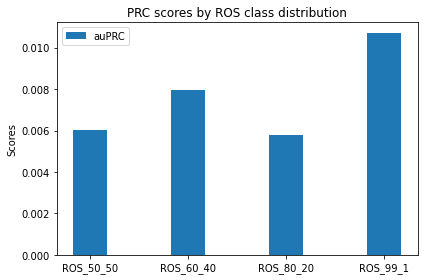

In [19]:
import matplotlib.pyplot as plt
import numpy as np


labels = results.keys()
auPRC_vals = [scores[0] for scores in results.values()]
auROC_vals = [scores[1] for scores in results.values()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, auPRC_vals, width, label='auPRC')
#rects2 = ax.bar(x + width/2, auROC_vals, width, label='auROC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Scores')
ax.set_title('Mean PRC scores by ROS class distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

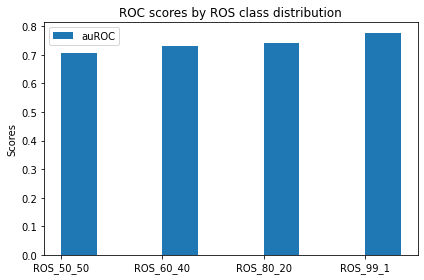

In [20]:
fig, ax = plt.subplots()
#rects1 = ax.bar(x, auPRC_vals, width, label='auPRC')
rects2 = ax.bar(x + width/2, auROC_vals, width, label='auROC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Scores')
ax.set_title('Mean ROC scores by ROS class distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()